In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import argparse
import sys
import gzip
import operator
from scipy import stats
import scipy as sp
import json
from sklearn.metrics import normalized_mutual_info_score
import community
import datetime as dt

from network_ei import *
from causal_emergence import *
from get_motifs import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

%matplotlib inline

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 08: Effective Information Differences in Real Networks

Null models and real networks

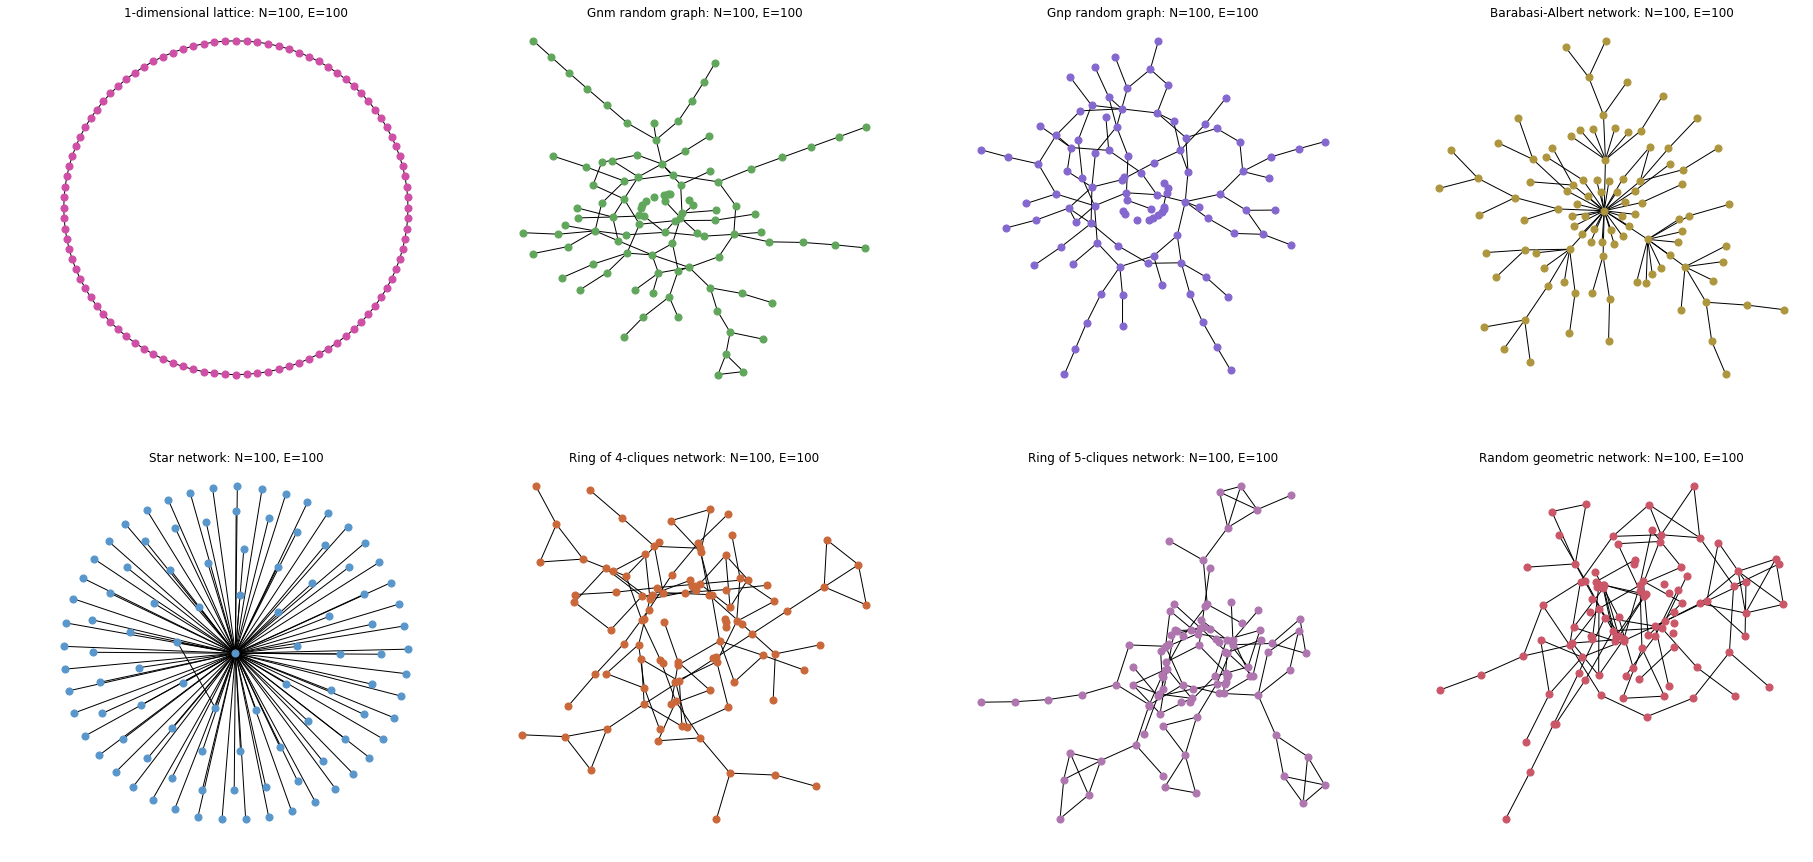

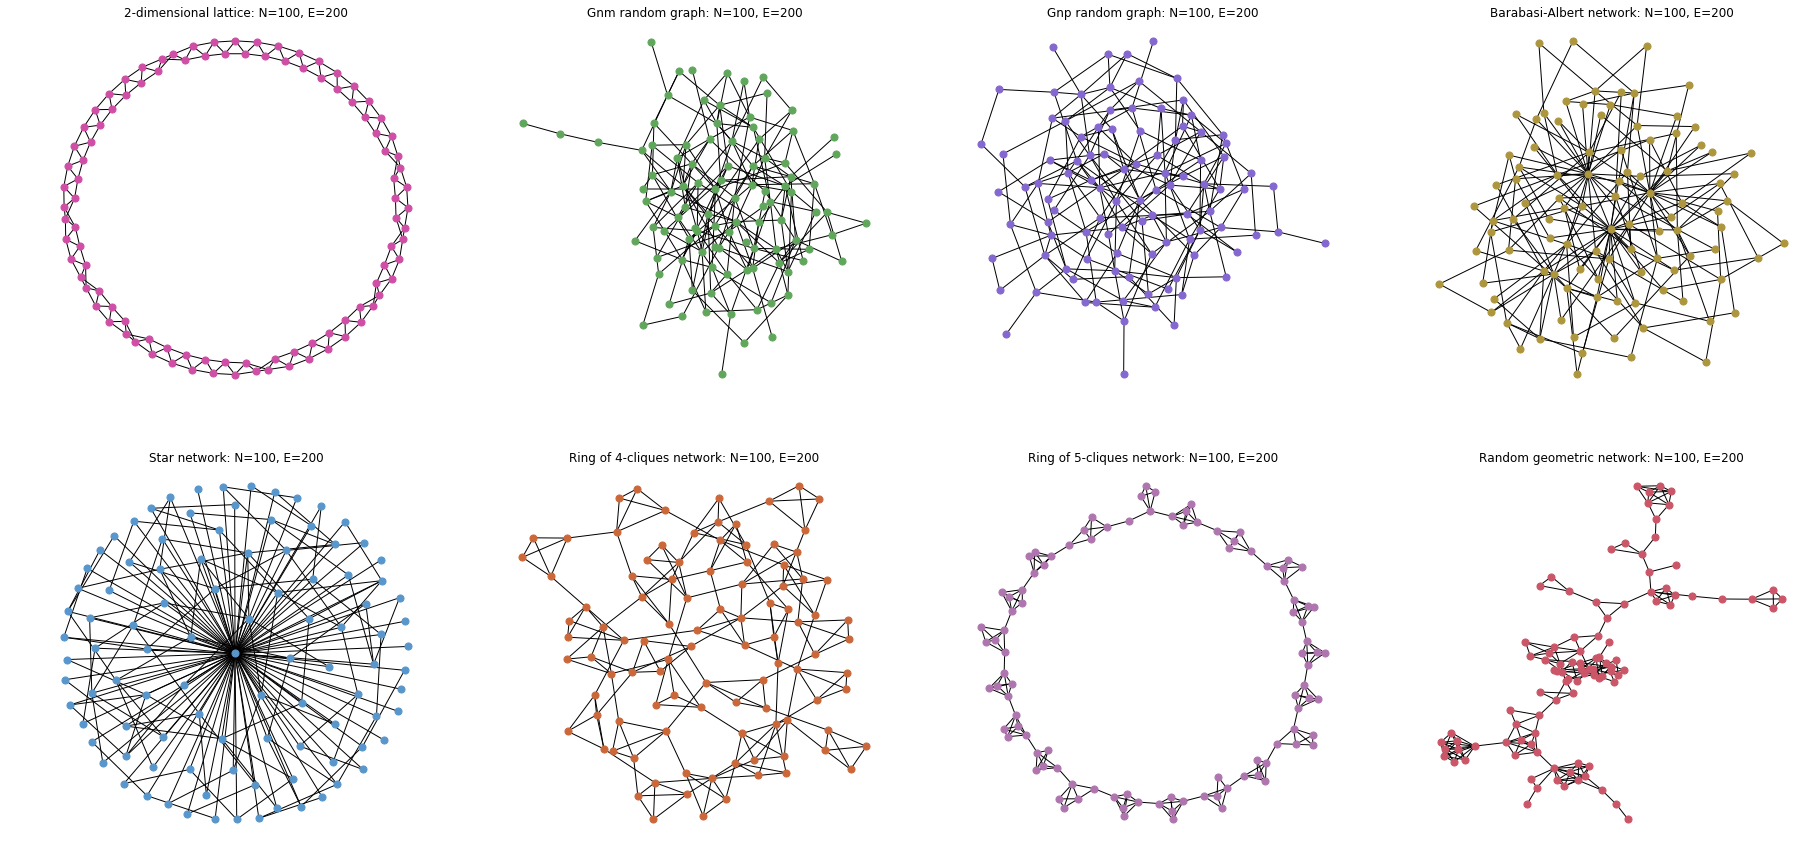

In [3]:
cols = ["#ce4fa5","#60a75c","#8567d0","#ad963e","#5896cb","#cb683a","#af75ae","#ca5668"]
list_of_graphdicts = []
N = 100
k = 2

# d-dimensional lattice
Gdd_lab = '%i-dimensional lattice'%(k/2)
Gdd = nx.watts_strogatz_graph(N, k, 0.0)
E = Gdd.number_of_edges()

# Gnm random graph
Gnm_lab = 'Gnm random graph'
Gnm = nx.gnm_random_graph(N, E)

# Gnp random graph
Gnp_lab = 'Gnp random graph'
Gnp = nx.gnp_random_graph(N, k/N)
while Gnp.number_of_edges()!= E:
    Gnp = nx.gnp_random_graph(N, k/N)

# Barabasi-Albert network
Gba_lab = 'Barabasi-Albert network'
Gba = nx.barabasi_albert_graph(N, int(k/2))
for i in range((E-Gba.number_of_edges())):
    eij = np.random.choice(list(Gba.nodes()), 2, replace=False)
    while eij in Gba.edges():
        eij = np.random.choice(list(Gba.nodes()), 2, replace=False)
    Gba.add_edge(eij[0], eij[1])

# Star network
Gst_lab = 'Star network'
Gst = nx.star_graph(N-1)
eij = np.random.choice(list(Gst.nodes()), 2, replace=False)
while eij in Gst.edges():
    eij = np.random.choice(list(Gst.nodes()), 2, replace=False)
Gst.add_edge(eij[0], eij[1])

# Ring of 4-cliques network
clique_size = 4
Gr4_lab = 'Ring of %i-cliques network'%clique_size
n_cliques = int(N / clique_size)
Gr4 = nx.ring_of_cliques(n_cliques, clique_size)
if E-Gr4.number_of_edges()+1 > 0:
    for i in range((E-Gr4.number_of_edges())):
        eij = np.random.choice(list(Gr4.nodes()), 2, replace=False)
        while eij in Gr4.edges():
            eij = np.random.choice(list(Gr4.nodes()), 2, replace=False)
        Gr4.add_edge(eij[0], eij[1])
if E-Gr4.number_of_edges()+1 < 0:
    for i in range((Gr4.number_of_edges()-E)):
        eij = np.random.choice(list(range(len(Gr4.edges()))))
        Gr4.remove_edge(list(Gr4.edges())[eij][0],list(Gr4.edges())[eij][1])
    
# Ring of 5-cliques network
clique_size = 5
Gr5_lab = 'Ring of %i-cliques network'%clique_size
n_cliques = int(N / clique_size)
Gr5 = nx.ring_of_cliques(n_cliques, clique_size)
if E-Gr5.number_of_edges()+1 > 0:
    for i in range((E-Gr5.number_of_edges()+1)):
        eij = np.random.choice(list(Gr5.nodes()), 2, replace=False)
        while eij in Gr5.edges():
            eij = np.random.choice(list(Gr5.nodes()), 2, replace=False)
        Gr5.add_edge(eij[0], eij[1])

if E-Gr5.number_of_edges()+1 < 0:
    for i in range((Gr5.number_of_edges()-E)):
        eij = np.random.choice(list(range(len(Gr5.edges()))))
        Gr5.remove_edge(list(Gr5.edges())[eij][0],list(Gr5.edges())[eij][1])

# Random geometric graph 
Grg_lab = 'Random geometric network'
hi = 1.0/k
lo = 1.0/N
num = 75
dist = np.linspace(lo, hi, num)
Grg_curr = nx.random_geometric_graph(N, lo/2)
for p in dist:
    Grg = Grg_curr.copy()
    Grg_curr = nx.random_geometric_graph(N, p)
    if Grg_curr.number_of_edges() > E:
        break
if E-Grg.number_of_edges()+1 > 0:
    for i in range((E-Grg.number_of_edges())):
        eij = np.random.choice(list(Grg.nodes()), 2, replace=False)
        while eij in Grg.edges():
            eij = np.random.choice(list(Grg.nodes()), 2, replace=False)
        Grg.add_edge(eij[0], eij[1])
        
h = 10
w = 21
mult = 1.5
fig, ((ax0, ax1, ax2, ax3),(ax4, ax5, ax6, ax7)) = plt.subplots(2, 4, figsize=(w*mult, h*mult))

nx.draw_kamada_kawai(Gdd, node_size=50, node_color=cols[0], ax=ax0)
nx.draw_kamada_kawai(Gnm, node_size=50, node_color=cols[1], ax=ax1)
nx.draw_kamada_kawai(Gnp, node_size=50, node_color=cols[2], ax=ax2)
nx.draw_kamada_kawai(Gba, node_size=50, node_color=cols[3], ax=ax3)

nx.draw_kamada_kawai(Gst, node_size=50, node_color=cols[4], ax=ax4)
nx.draw_kamada_kawai(Gr4, node_size=50, node_color=cols[5], ax=ax5)
nx.draw_kamada_kawai(Gr5, node_size=50, node_color=cols[6], ax=ax6)
nx.draw_kamada_kawai(Grg, node_size=50, node_color=cols[7], ax=ax7)

ax0.set_title("%s: N=%i, E=%i"%(Gdd_lab, Gdd.number_of_nodes(), Gdd.number_of_edges()), fontsize=12)
ax1.set_title("%s: N=%i, E=%i"%(Gnm_lab, Gnm.number_of_nodes(), Gnm.number_of_edges()), fontsize=12)
ax2.set_title("%s: N=%i, E=%i"%(Gnp_lab, Gnp.number_of_nodes(), Gnp.number_of_edges()), fontsize=12)
ax3.set_title("%s: N=%i, E=%i"%(Gba_lab, Gba.number_of_nodes(), Gba.number_of_edges()), fontsize=12)
ax4.set_title("%s: N=%i, E=%i"%(Gst_lab, Gst.number_of_nodes(), Gst.number_of_edges()), fontsize=12)
ax5.set_title("%s: N=%i, E=%i"%(Gr4_lab, Gr4.number_of_nodes(), Gr4.number_of_edges()), fontsize=12)
ax6.set_title("%s: N=%i, E=%i"%(Gr5_lab, Gr5.number_of_nodes(), Gr5.number_of_edges()), fontsize=12)
ax7.set_title("%s: N=%i, E=%i"%(Grg_lab, Grg.number_of_nodes(), Grg.number_of_edges()), fontsize=12)

plt.show()

n100e100 = {Gdd_lab: Gdd,
            Gnm_lab: Gnm,
            Gnp_lab: Gnp,
            Gba_lab: Gba,
            Gst_lab: Gst,
            Gr4_lab: Gr4,
            Gr5_lab: Gr5,
            Grg_lab: Grg}
list_of_graphdicts.append(n100e100)

# N = [100, 200, 300, 400, 500]
# k = [2, 4, 6]
N = 100
k = 4

# d-dimensional lattice
Gdd_lab = '%i-dimensional lattice'%(k/2)
Gdd = nx.watts_strogatz_graph(N, k, 0.0)
E = Gdd.number_of_edges()

# Gnm random graph
Gnm_lab = 'Gnm random graph'
Gnm = nx.gnm_random_graph(N, E)

# Gnp random graph
Gnp_lab = 'Gnp random graph'
Gnp = nx.gnp_random_graph(N, k/N)
while Gnp.number_of_edges()!= E:
    Gnp = nx.gnp_random_graph(N, k/N)

# Barabasi-Albert network
Gba_lab = 'Barabasi-Albert network'
Gba = nx.barabasi_albert_graph(N, int(k/2))
for i in range((E-Gba.number_of_edges())):
    eij = np.random.choice(list(Gba.nodes()), 2, replace=False)
    while eij in Gba.edges():
        eij = np.random.choice(list(Gba.nodes()), 2, replace=False)
    Gba.add_edge(eij[0], eij[1])

# Star network
Gst_lab = 'Star network'
Gst = nx.star_graph(N-1)
eij = np.random.choice(list(Gst.nodes()), 2, replace=False)
if E-Gst.number_of_edges()+1 > 0:
    for i in range((E-Gst.number_of_edges())):
        eij = np.random.choice(list(Gst.nodes()), 2, replace=False)
        while eij in Gst.edges():
            eij = np.random.choice(list(Gst.nodes()), 2, replace=False)
        Gst.add_edge(eij[0], eij[1])
if E-Gst.number_of_edges()+1 < 0:
    for i in range((Gst.number_of_edges()-E)):
        eij = np.random.choice(list(range(len(Gst.edges()))))
        Gst.remove_edge(list(Gst.edges())[eij][0],list(Gst.edges())[eij][1])

# Ring of 4-cliques network
clique_size = 4
Gr4_lab = 'Ring of %i-cliques network'%clique_size
n_cliques = int(N / clique_size)
Gr4 = nx.ring_of_cliques(n_cliques, clique_size)
if E-Gr4.number_of_edges()+1 > 0:
    for i in range((E-Gr4.number_of_edges())):
        eij = np.random.choice(list(Gr4.nodes()), 2, replace=False)
        while eij in Gr4.edges():
            eij = np.random.choice(list(Gr4.nodes()), 2, replace=False)
        Gr4.add_edge(eij[0], eij[1])
if E-Gr4.number_of_edges()+1 < 0:
    for i in range((Gr4.number_of_edges()-E)):
        eij = np.random.choice(list(range(len(Gr4.edges()))))
        Gr4.remove_edge(list(Gr4.edges())[eij][0],list(Gr4.edges())[eij][1])
    
# Ring of 5-cliques network
clique_size = 5
Gr5_lab = 'Ring of %i-cliques network'%clique_size
n_cliques = int(N / clique_size)
Gr5 = nx.ring_of_cliques(n_cliques, clique_size)
if E-Gr5.number_of_edges()+1 > 0:
    for i in range((E-Gr5.number_of_edges()+1)):
        eij = np.random.choice(list(Gr5.nodes()), 2, replace=False)
        while eij in Gr5.edges():
            eij = np.random.choice(list(Gr5.nodes()), 2, replace=False)
        Gr5.add_edge(eij[0], eij[1])

if E-Gr5.number_of_edges()+1 < 0:
    for i in range((Gr5.number_of_edges()-E)):
        eij = np.random.choice(list(range(len(Gr5.edges()))))
        Gr5.remove_edge(list(Gr5.edges())[eij][0],list(Gr5.edges())[eij][1])

# Random geometric graph 
Grg_lab = 'Random geometric network'
hi = 1.0/k
lo = 1.0/N
num = 75
dist = np.linspace(lo, hi, num)
Grg_curr = nx.random_geometric_graph(N, lo/2)
for p in dist:
    Grg = Grg_curr.copy()
    Grg_curr = nx.random_geometric_graph(N, p)
    if Grg_curr.number_of_edges() > E:
        break
if E-Grg.number_of_edges()+1 > 0:
    for i in range((E-Grg.number_of_edges())):
        eij = np.random.choice(list(Grg.nodes()), 2, replace=False)
        while eij in Grg.edges():
            eij = np.random.choice(list(Grg.nodes()), 2, replace=False)
        Grg.add_edge(eij[0], eij[1])
        
h = 10
w = 21
mult = 1.5
fig, ((ax0, ax1, ax2, ax3),(ax4, ax5, ax6, ax7)) = plt.subplots(2, 4, figsize=(w*mult, h*mult))

nx.draw_kamada_kawai(Gdd, node_size=50, node_color=cols[0], ax=ax0)
nx.draw_kamada_kawai(Gnm, node_size=50, node_color=cols[1], ax=ax1)
nx.draw_kamada_kawai(Gnp, node_size=50, node_color=cols[2], ax=ax2)
nx.draw_kamada_kawai(Gba, node_size=50, node_color=cols[3], ax=ax3)

nx.draw_kamada_kawai(Gst, node_size=50, node_color=cols[4], ax=ax4)
nx.draw_kamada_kawai(Gr4, node_size=50, node_color=cols[5], ax=ax5)
nx.draw_kamada_kawai(Gr5, node_size=50, node_color=cols[6], ax=ax6)
nx.draw_kamada_kawai(Grg, node_size=50, node_color=cols[7], ax=ax7)

ax0.set_title("%s: N=%i, E=%i"%(Gdd_lab, Gdd.number_of_nodes(), Gdd.number_of_edges()), fontsize=12)
ax1.set_title("%s: N=%i, E=%i"%(Gnm_lab, Gnm.number_of_nodes(), Gnm.number_of_edges()), fontsize=12)
ax2.set_title("%s: N=%i, E=%i"%(Gnp_lab, Gnp.number_of_nodes(), Gnp.number_of_edges()), fontsize=12)
ax3.set_title("%s: N=%i, E=%i"%(Gba_lab, Gba.number_of_nodes(), Gba.number_of_edges()), fontsize=12)
ax4.set_title("%s: N=%i, E=%i"%(Gst_lab, Gst.number_of_nodes(), Gst.number_of_edges()), fontsize=12)
ax5.set_title("%s: N=%i, E=%i"%(Gr4_lab, Gr4.number_of_nodes(), Gr4.number_of_edges()), fontsize=12)
ax6.set_title("%s: N=%i, E=%i"%(Gr5_lab, Gr5.number_of_nodes(), Gr5.number_of_edges()), fontsize=12)
ax7.set_title("%s: N=%i, E=%i"%(Grg_lab, Grg.number_of_nodes(), Grg.number_of_edges()), fontsize=12)

plt.show()

n100e400 = {Gdd_lab: Gdd,
            Gnm_lab: Gnm,
            Gnp_lab: Gnp,
            Gba_lab: Gba,
            Gst_lab: Gst,
            Gr4_lab: Gr4,
            Gr5_lab: Gr5,
            Grg_lab: Grg}

list_of_graphdicts.append(n100e400)

______________

In [4]:
def weighted_directed_config_model(G):
    """
    INPUT
    -----
    G: a directed, weighted network
    
    OUTPUT
    ------
    H: randomized network with same strength distribution
       as the original network and the contribution to strength 
       of each node in terms of its in-weights and out-weights
       is the same
    """
    # Get the in- and out-degree distributions
    k_in = dict(G.in_degree())
    k_out = dict(G.out_degree())
    weights_in = dict(G.in_degree(weight='weight'))
    weights_out = dict(G.out_degree(weight='weight'))
    # Get stubs lists
    in_stubs = []
    out_stubs = []
    for node in weights_in:
        for _ in range(k_in[node]):
            in_stubs.append(node)
        for _ in range(k_out[node]):
            out_stubs.append(node)
    # Shuffle stubs lists
    np.random.shuffle(in_stubs)
    np.random.shuffle(out_stubs)
    # Make network by popping from each stub list
    H = nx.DiGraph()
    for _ in range(len(in_stubs)):
        source = out_stubs.pop()
        target = in_stubs.pop()
        if H.has_edge(source, target):
            H[source][target]['weight'] += 1
        else:
            H.add_edge(source, target, weight=1)
    
    
    
    return H

In [5]:
# W = weighted_directed_config_model(Gba)

In [7]:
gs = [Gdd, Gnm, Gnp, Gba, Gst, Gr4, Gr5, Grg]
labs = [Gdd_lab, Gnm_lab, Gnp_lab, Gba_lab, Gst_lab, Gr4_lab, Gr5_lab, Grg_lab]

In [8]:
ei = []
ef = []
fn = []
for i in range(len(gs)):
    Gr = gs[i]
    la = labs[i]
    print("Graph:", la)
    print("Effective Info:\t",get_ei(Gr))
    print("Effectivency:\t",get_ei(Gr)/np.log2(Gr.number_of_nodes()))
    print("Efficiency:\t",nx.global_efficiency(Gr))
    print()
    ei.append(get_ei(Gr))
    ef.append(get_ei(Gr)/np.log2(Gr.number_of_nodes()))
    fn.append(nx.global_efficiency(Gr))

Graph: 2-dimensional lattice
Effective Info:	 4.64385334507
Effectivency:	 0.698969570192
Efficiency:	 0.15377608799003556

Graph: Gnm random graph
Effective Info:	 4.5144731726
Effectivency:	 0.679495923884
Efficiency:	 0.3160533910533965

Graph: Gnp random graph
Effective Info:	 4.62151711828
Effectivency:	 0.69560763879
Efficiency:	 0.33032275132275585

Graph: Barabasi-Albert network
Effective Info:	 4.25252550546
Effectivency:	 0.640068865309
Efficiency:	 0.3798013468013711

Graph: Star network
Effective Info:	 3.25154988174
Effectivency:	 0.489407025083
Efficiency:	 0.5202020202020202

Graph: Ring of 4-cliques network
Effective Info:	 4.63958569963
Effectivency:	 0.698327232238
Efficiency:	 0.2705731120731091

Graph: Ring of 5-cliques network
Effective Info:	 4.63141802164
Effectivency:	 0.697097873697
Efficiency:	 0.16251818917774347

Graph: Random geometric network
Effective Info:	 4.66587555978
Effectivency:	 0.702284256001
Efficiency:	 0.1290944999958747



In [89]:
nx.barabasi_albert_graph(130,5).number_of_edges()

625

0.07453786523553965

In [102]:
nx.erdos_renyi_graph(130, nx.density(nx.barabasi_albert_graph(130,5))).number_of_edges()

639

In [121]:
Ns = [50,90,130]
ms = [1,3,5,7,9]
ntimes = 250
ba_out_dict = {'effectiveness':[],
               'efficiency':[]}
er_out_dict = {'effectiveness':[],
               'efficiency':[]}
coli = 0
colorlist = ["#6a8ccd","#c4ce38","#785cd5","#71d65a","#ca47bf","#4c9250","#e33737",
             "#64d7bd","#c64c71","#bdcd79","#c079b9","#d99d36","#c05931","#7f772e","#d8916e"]
ba_cols = []
er_cols = []

ba_labels = []
er_labels = []

for N in Ns:
    for m in ms:
        print(N,m)
        for i in range(ntimes):
            G_ba = nx.barabasi_albert_graph(N, m)
            ba_out_dict['effectiveness'].append(get_ei(G_ba)/np.log2(G_ba.number_of_nodes()))
            ba_out_dict['efficiency'].append(nx.global_efficiency(G_ba))
            ba_cols.append(colorlist[coli])
            
            p = nx.density(G_ba)
            G_er = nx.erdos_renyi_graph(N, p)
            er_out_dict['effectiveness'].append(get_ei(G_er)/np.log2(G_er.number_of_nodes()))
            er_out_dict['efficiency'].append(nx.global_efficiency(G_er))
            er_cols.append(colorlist[coli])
        
        er_labels.append("ER: N=%i, p=%.4f"%(N, p))
        ba_labels.append("BA: N=%i, m=%i"%(N, m))
        coli += 1

50 1
50 3
50 5
50 7
50 9
90 1
90 3
90 5
90 7
90 9
130 1
130 3
130 5
130 7
130 9


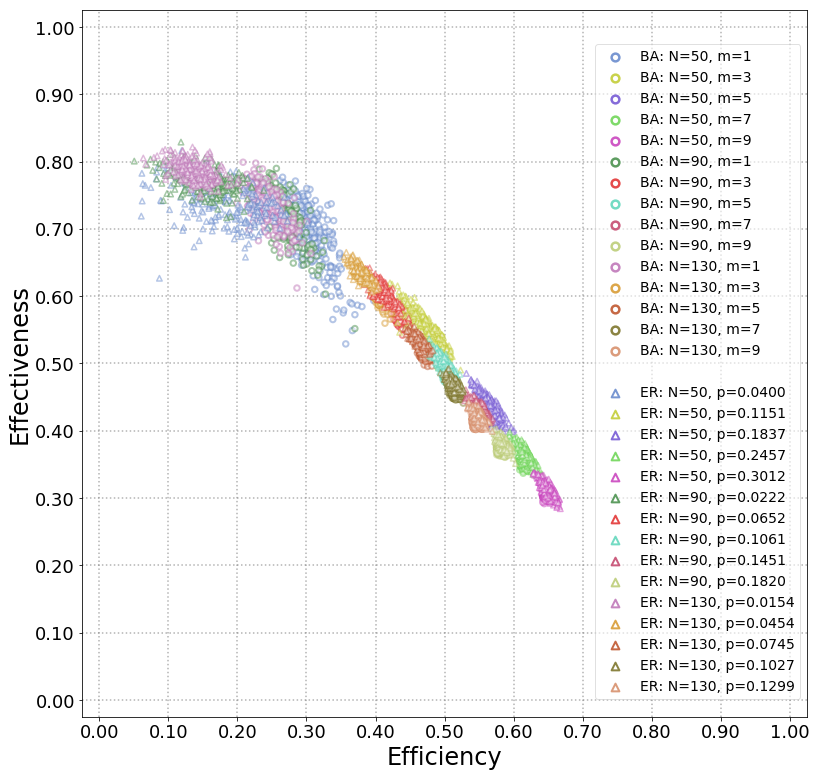

In [140]:
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(13,13))

plt.scatter(np.array(ba_out_dict['efficiency'])   +np.random.uniform(-0.007,0.007,len(ba_out_dict['efficiency'])), 
            np.array(ba_out_dict['effectiveness'])+np.random.uniform(-0.007,0.007,len(ba_out_dict['effectiveness'])),  
            marker='o', alpha=0.5, s=30, edgecolor=ba_cols, linewidths=2.0, color='white')
for i in range(len(ba_labels)):
    plt.scatter([-10], [-10], marker='o', alpha=0.9, s=60, 
        edgecolors=colorlist[i], linewidths=2.5, color='white', label=ba_labels[i])

plt.scatter(np.array(er_out_dict['efficiency'])   +np.random.uniform(-0.007,0.007,len(er_out_dict['efficiency'])), 
            np.array(er_out_dict['effectiveness'])+np.random.uniform(-0.007,0.007,len(er_out_dict['effectiveness'])),  
            marker='^', alpha=0.5, s=30, edgecolor=er_cols, linewidths=1.5, color='white')

plt.scatter([-10], [-10], marker='o', alpha=0.8, s=60, 
    edgecolors='w', linewidths=2.5, color='white', label=' ')

for i in range(len(er_labels)):
    plt.scatter([-10], [-10], marker='^', alpha=0.9, s=60, 
        edgecolors=colorlist[i], linewidths=2.0, color='white', label=er_labels[i])
    
plt.ylabel('Effectiveness', size=24)
plt.xlabel('Efficiency', size=24)
plt.xticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18)
plt.yticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18)
plt.grid(alpha=0.6, color='grey', linestyle=':', linewidth=1.5)
plt.xlim(-0.025,1.025)
plt.ylim(-0.025,1.025)
plt.legend(bbox_to_anchor=(1.0,0.962), ncol=1, fontsize=14, framealpha=0.6)
# plt.legend(bbox_to_anchor=(0.7,1.0), ncol=2, fontsize=14, framealpha=0.8)

# plt.savefig("../figs/pngs/effectiveness_efficiency_erba.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/effectiveness_efficiency_erba.pdf", bbox_inches='tight')

plt.show()

In [133]:
# plt.rc('axes', axisbelow=True)
# plt.figure(figsize=(12,12))

# plt.scatter(np.array(out_dict['efficiency'])   +np.random.uniform(-0.01,0.01,len(out_dict['efficiency'])), 
#             np.array(out_dict['effectiveness'])+np.random.uniform(-0.01,0.01,len(out_dict['effectiveness'])),
#             marker='.', alpha=0.7, s=100, 
#             edgecolor=cols, linewidths=2.5, color='white')
# for i in range(len(labels)):
#     plt.scatter([-10], [-10], marker='o', alpha=0.8, s=100, 
#         edgecolors=colorlist[i], linewidths=3.5,color='white', label=labels[i])

# plt.ylabel('Effectiveness', size=24)
# plt.xlabel('Efficiency', size=24)
# plt.xticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18)
# plt.yticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18)
# plt.grid(alpha=0.6, color='grey', linestyle=':', linewidth=1.5)
# plt.xlim(-0.01,1.01)
# plt.ylim(-0.01,1.01)
# plt.legend(fontsize=16)

# plt.savefig("../figs/pngs/ba_effectiveness_efficiency.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/ba_effectiveness_efficiency.pdf", bbox_inches='tight')

# plt.show()

In [134]:
# Ns = [50,90,130]
# ms = [0.005, 0.01, 0.025, 0.05, 0.1]
# ms = [1,3,5,7,9]

# ntimes = 100
# er_out_dict = {'effectiveness':[],
#                'efficiency':[]}
# coli = 0
# er_cols = []
# colorlist = ["#6a8ccd","#c4ce38","#785cd5","#71d65a","#ca47bf","#4c9250","#e33737",
#              "#64d7bd","#c64c71","#bdcd79","#c079b9","#d99d36","#c05931","#7f772e","#d8916e"]

# er_labels = []
# for N in Ns:
#     for m in ms:
#         print(N,m)
#         for i in range(ntimes):
#             G_er = nx.erdos_renyi_graph(N, N/)
#             er_out_dict['effectiveness'].append(get_ei(G_er)/np.log2(G_er.number_of_nodes()))
#             er_out_dict['efficiency'].append(nx.global_efficiency(G_er))
#             er_cols.append(colorlist[coli])
#         er_labels.append("ER: N=%i, p=%.4f"%(N, m))
#         coli += 1

In [135]:
# plt.rc('axes', axisbelow=True)
# plt.figure(figsize=(12,12))

# plt.scatter(np.array(out_dict['efficiency'])   +np.random.uniform(-0.01,0.01,len(out_dict['efficiency'])), 
#             np.array(out_dict['effectiveness'])+np.random.uniform(-0.01,0.01,len(out_dict['effectiveness'])),  
#             marker='^', alpha=0.7, s=70, 
#             edgecolor=cols, linewidths=1.5, color='white')
# for i in range(len(labels)):
#     plt.scatter([-10], [-10], marker='^', alpha=0.8, s=100, 
#         edgecolors=colorlist[i], linewidths=2.5,color='white', label=labels[i])

# plt.ylabel('Effectiveness', size=24)
# plt.xlabel('Efficiency', size=24)
# plt.xticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18)
# plt.yticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=18)
# plt.grid(alpha=0.9, color='gainsboro', linestyle='--', linewidth=2.0)
# plt.xlim(-0.025,1.025)
# plt.ylim(-0.025,1.025)
# plt.legend(fontsize=15)

# plt.savefig("../figs/pngs/er_effectiveness_efficiency.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/er_effectiveness_efficiency.pdf", bbox_inches='tight')

# plt.show()

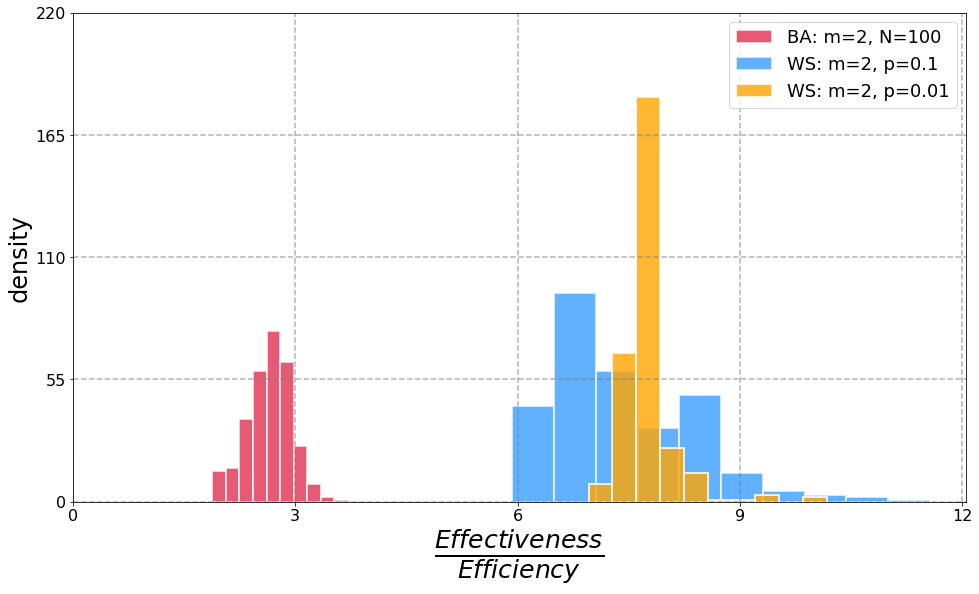

In [141]:
plt.figure(figsize=(16,9))
plt.hist(np.array(ba_ef)/np.array(ba_fn), bins=10, label='BA: m=2, N=100', color='crimson', 
         alpha=0.7, edgecolor='w', linewidth=2.0)
plt.hist(np.array(ws1_ef)/np.array(ws1_fn), bins=10, label='WS: m=2, p=0.1', color='dodgerblue',
         alpha=0.7, edgecolor='w', linewidth=2.0)
plt.hist(np.array(ws2_ef)/np.array(ws2_fn), bins=10, label='WS: m=2, p=0.01', color='orange',
         alpha=0.8, edgecolor='w', linewidth=2.0)
plt.xlabel(r'$\frac{Effectiveness}{Efficiency}$', fontsize=36)
plt.ylabel('density', fontsize=24)
plt.xticks(np.linspace(0,12,5,int), fontsize=16)
plt.yticks(np.linspace(0,220,5,int), fontsize=16)
plt.grid(alpha=0.6, color='grey', linestyle='--', linewidth=1.5)
plt.legend(fontsize=18)

plt.savefig("../figs/pngs/test_disteffectiveness_efficiency.png", dpi=425, bbox_inches='tight')
plt.savefig("../figs/pdfs/test_disteffectiveness_efficiency.pdf", bbox_inches='tight')

plt.show()

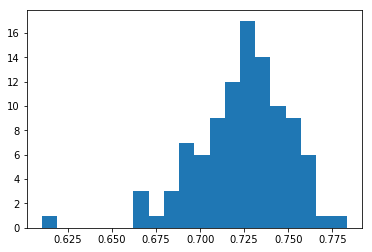

In [34]:
plt.hist(ef, bins=20);
# plt.hist(fn, bins=20);

# Citations

In [6]:
citation_dict = {'Name':["High Energy Physics - Phenomenology","High Energy Physics - Theory", #"Citeseer Citations",
                         "Cora Citations", "DBLP Citations"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/citations/cit-HepPh/out.cit-HepPh", 
                             "../data/konect_data/citations/cit-HepTh/out.cit-HepTh",
#                              "../data/konect_data/citations/citeseer/out.citeseer",
                             "../data/konect_data/citations/subelj_cora/out.subelj_cora_cora",
                             "../data/konect_data/citations/dblp-cite/out.dblp-cite"]}

for fn in citation_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        citation_dict['Network'].append(g)
        
print()
for net in range(len(citation_dict['Network'])):
    print(citation_dict['Name'][net], "has",
          citation_dict['Network'][net].number_of_nodes(), "nodes and",
          citation_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/citations/cit-HepPh/out.cit-HepPh
../data/konect_data/citations/cit-HepTh/out.cit-HepTh
../data/konect_data/citations/subelj_cora/out.subelj_cora_cora
../data/konect_data/citations/dblp-cite/out.dblp-cite

High Energy Physics - Phenomenology has 34546 nodes and 421578 edges.
High Energy Physics - Theory has 27770 nodes and 352807 edges.
Cora Citations has 23166 nodes and 91500 edges.
DBLP Citations has 12591 nodes and 49743 edges.


# Coauthorships

In [7]:
coauthor_dict = {'Name':["arXiv Astrophysics Coauthorships", "High Energy Physics - Phenomenology Coauthorships",
                         "High Energy Physics - Theory Coauthorships"],#,"DBLP Coauthorships"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/coauthorship/ca-AstroPh/out.ca-AstroPh", 
                             "../data/konect_data/coauthorship/ca-cit-HepPh/out.ca-cit-HepPh", 
                             "../data/konect_data/coauthorship/ca-cit-HepTh/out.ca-cit-HepTh"]}#, 
#                              "../data/konect_data/coauthorship/com-dblp/out.com-dblp"]}

for fn in coauthor_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                              data=[('weight', float), ('paperID', float)])
        coauthor_dict['Network'].append(g)
        
print()
for net in range(len(coauthor_dict['Network'])):
    print(coauthor_dict['Name'][net], "has",
          coauthor_dict['Network'][net].number_of_nodes(), "nodes and",
          coauthor_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/coauthorship/ca-AstroPh/out.ca-AstroPh
../data/konect_data/coauthorship/ca-cit-HepPh/out.ca-cit-HepPh
../data/konect_data/coauthorship/ca-cit-HepTh/out.ca-cit-HepTh

arXiv Astrophysics Coauthorships has 18771 nodes and 198050 edges.
High Energy Physics - Phenomenology Coauthorships has 28093 nodes and 3148446 edges.
High Energy Physics - Theory Coauthorships has 22908 nodes and 2444797 edges.


# Communication

In [8]:
communic_dict = {'Name':["Tarragona Emails", "DNC Emails", "EU Emails", #"Enron Emails",
                         "Facebook Wall Posts", "Linux Kernel Email List", "Digg Replies", "UC Irvine Messages",
                         "Manufacturing Company Emails", "Slashdot Threads"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/communication/arenas-email/out.arenas-email", 
                             "../data/konect_data/communication/dnc-temporalGraph/out.dnc-temporalGraph", 
                             "../data/konect_data/communication/email-EuAll/out.email-EuAll", 
#                              "../data/konect_data/communication/enron/out.enron", 
                             "../data/konect_data/communication/facebook-wosn-wall/out.facebook-wosn-wall",
                             "../data/konect_data/communication/lkml-reply/out.lkml-reply", 
                             "../data/konect_data/communication/munmun_digg_reply/out.munmun_digg_reply", 
                             "../data/konect_data/communication/opsahl-ucsocial/out.opsahl-ucsocial", 
                             "../data/konect_data/communication/radoslaw_email/out.radoslaw_email_email", 
                             "../data/konect_data/communication/slashdot-threads/out.slashdot-threads"]}

for fn in communic_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                              data=[('weight', float), ('timestamp', float)])
        communic_dict['Network'].append(g)
        
print()
for net in range(len(communic_dict['Network'])):
    print(communic_dict['Name'][net], "has",
          communic_dict['Network'][net].number_of_nodes(), "nodes and",
          communic_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/communication/arenas-email/out.arenas-email
../data/konect_data/communication/dnc-temporalGraph/out.dnc-temporalGraph
../data/konect_data/communication/email-EuAll/out.email-EuAll
../data/konect_data/communication/facebook-wosn-wall/out.facebook-wosn-wall
../data/konect_data/communication/lkml-reply/out.lkml-reply
../data/konect_data/communication/munmun_digg_reply/out.munmun_digg_reply
../data/konect_data/communication/opsahl-ucsocial/out.opsahl-ucsocial
../data/konect_data/communication/radoslaw_email/out.radoslaw_email_email
../data/konect_data/communication/slashdot-threads/out.slashdot-threads

Tarragona Emails has 1133 nodes and 5451 edges.
DNC Emails has 1891 nodes and 5598 edges.
EU Emails has 265214 nodes and 420045 edges.
Facebook Wall Posts has 46951 nodes and 274085 edges.
Linux Kernel Email List has 27927 nodes and 242976 edges.
Digg Replies has 30398 nodes and 86403 edges.
UC Irvine Messages has 1899 nodes and 20295 edges.
Manufacturing Company Emails 

# Computer

In [9]:
computer_dict = {'Name':["CAIDA Autonomous Systems", #"Skitter Autonomous Systems", 
                         "as20000102 Autonomous Systems", "p2p Gnutella", "Internet Autonomous Systems"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/computer/as-caida20071105/out.as-caida20071105", 
#                              "../data/konect_data/computer/as-skitter/out.as-skitter", 
                             "../data/konect_data/computer/as20000102/out.as20000102", 
                             "../data/konect_data/computer/p2p-Gnutella31/out.p2p-Gnutella31", 
                             "../data/konect_data/computer/topology/out.topology"]}

for fn in computer_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                              data=[('weight', float), ('timestamp', float)])
        computer_dict['Network'].append(g)
        
print()
for net in range(len(computer_dict['Network'])):
    print(computer_dict['Name'][net], "has",
          computer_dict['Network'][net].number_of_nodes(), "nodes and",
          computer_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/computer/as-caida20071105/out.as-caida20071105
../data/konect_data/computer/as20000102/out.as20000102
../data/konect_data/computer/p2p-Gnutella31/out.p2p-Gnutella31
../data/konect_data/computer/topology/out.topology

CAIDA Autonomous Systems has 26475 nodes and 53381 edges.
as20000102 Autonomous Systems has 6474 nodes and 13895 edges.
p2p Gnutella has 62586 nodes and 147892 edges.
Internet Autonomous Systems has 34761 nodes and 114495 edges.


# Human Contact

In [10]:
humancon_dict = {'Name':["RFID Contact", "Reality Mining", "California Windsurfers", "Train Terrorists",
                         "RFID Hypertext Conference", "RFID Infectious Conference"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/humancontact/contact/out.contact", 
                             "../data/konect_data/humancontact/mit/out.mit", 
                             "../data/konect_data/humancontact/moreno_beach/out.moreno_beach_beach", 
                             "../data/konect_data/humancontact/moreno_train/out.moreno_train_train", 
                             "../data/konect_data/humancontact/sociopatterns-hypertext/out.sociopatterns-hypertext",
                             "../data/konect_data/humancontact/sociopatterns-infectious/out.sociopatterns-infectious"]}

for fn in humancon_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        humancon_dict['Network'].append(g)
        
print()
for net in range(len(humancon_dict['Network'])):
    print(humancon_dict['Name'][net], "has",
          humancon_dict['Network'][net].number_of_nodes(), "nodes and",
          humancon_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/humancontact/contact/out.contact
../data/konect_data/humancontact/mit/out.mit
../data/konect_data/humancontact/moreno_beach/out.moreno_beach_beach
../data/konect_data/humancontact/moreno_train/out.moreno_train_train
../data/konect_data/humancontact/sociopatterns-hypertext/out.sociopatterns-hypertext
../data/konect_data/humancontact/sociopatterns-infectious/out.sociopatterns-infectious

RFID Contact has 274 nodes and 2899 edges.
Reality Mining has 96 nodes and 2539 edges.
California Windsurfers has 43 nodes and 335 edges.
Train Terrorists has 64 nodes and 242 edges.
RFID Hypertext Conference has 113 nodes and 2195 edges.
RFID Infectious Conference has 410 nodes and 2764 edges.


# Human Social

In [11]:
humansoc_dict = {'Name':["Jazz Musicians", "Ad Health", "Physician Innovations", "University Residents", 
                         "Monk Cloister Network", "7th Grade Students", "Household Gift-giving", 
                         "Freshmen Students", "Gahuku–Gama Alliance Structure"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/humansocial/arenas-jazz/out.arenas-jazz", 
                             "../data/konect_data/humansocial/moreno_health/out.moreno_health_health", 
                             "../data/konect_data/humansocial/moreno_innovation/out.moreno_innovation_innovation", 
                             "../data/konect_data/humansocial/moreno_oz/out.moreno_oz_oz", 
                             "../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson", 
                             "../data/konect_data/humansocial/moreno_seventh/out.moreno_seventh_seventh", 
                             "../data/konect_data/humansocial/moreno_taro/out.moreno_taro_taro", 
                             "../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb", 
                             "../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama"]}

for fn in humansoc_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        humansoc_dict['Network'].append(g)
        
print()
for net in range(len(humansoc_dict['Network'])):
    print(humansoc_dict['Name'][net], "has",
          humansoc_dict['Network'][net].number_of_nodes(), "nodes and",
          humansoc_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/humansocial/arenas-jazz/out.arenas-jazz
../data/konect_data/humansocial/moreno_health/out.moreno_health_health
../data/konect_data/humansocial/moreno_innovation/out.moreno_innovation_innovation
../data/konect_data/humansocial/moreno_oz/out.moreno_oz_oz
../data/konect_data/humansocial/moreno_sampson/out.moreno_sampson_sampson
../data/konect_data/humansocial/moreno_seventh/out.moreno_seventh_seventh
../data/konect_data/humansocial/moreno_taro/out.moreno_taro_taro
../data/konect_data/humansocial/moreno_vdb/out.moreno_vdb_vdb
../data/konect_data/humansocial/ucidata-gama/out.ucidata-gama

Jazz Musicians has 198 nodes and 2742 edges.
Ad Health has 2539 nodes and 12968 edges.
Physician Innovations has 241 nodes and 1098 edges.
University Residents has 217 nodes and 2671 edges.
Monk Cloister Network has 18 nodes and 188 edges.
7th Grade Students has 29 nodes and 375 edges.
Household Gift-giving has 22 nodes and 78 edges.
Freshmen Students has 32 nodes and 709 edges.
Gahuku–

# Hyperlink

In [14]:
hyperlin_dict = {'Name':["Free On-line Dictionary of Computing", "Political Blogs"],# #"Berkeley-Stanford Communication",
#                          "Google Hyperlinks", "Notre Dame Website", "Stanford Website", "Baidu Related Pages"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/hyperlink/foldoc/out.foldoc", 
                             "../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs"]}#,
#                              "../data/konect_data/hyperlink/web-BerkStan/out.web-BerkStan",
#                              "../data/konect_data/hyperlink/web-Google/out.web-Google",
#                              "../data/konect_data/hyperlink/web-NotreDame/out.web-NotreDame",
#                              "../data/konect_data/hyperlink/web-Stanford/out.web-Stanford",
#                              "../data/konect_data/hyperlink/zhishi-baidu-relatedpages/out.zhishi-baidu-relatedpages"]}

for fn in hyperlin_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        hyperlin_dict['Network'].append(g)
        
print()
for net in range(len(hyperlin_dict['Network'])):
    print(hyperlin_dict['Name'][net], "has",
          hyperlin_dict['Network'][net].number_of_nodes(), "nodes and",
          hyperlin_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/hyperlink/foldoc/out.foldoc
../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs

Free On-line Dictionary of Computing has 13356 nodes and 120237 edges.
Political Blogs has 1224 nodes and 19025 edges.


# Infrastructure

In [15]:
infrastr_dict = {'Name':["Federal Aviation Association", "Open Flights v1", "Open Flights v2", "U.S. Powergrid",
                         "U.S. Airports"],# "Pennsylvania Road Network", "Texas Road Network"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/infrastructure/maayan-faa/out.maayan-faa", 
                             "../data/konect_data/infrastructure/openflights/out.openflights",
                             "../data/konect_data/infrastructure/opsahl-openflights/out.opsahl-openflights",
                             "../data/konect_data/infrastructure/opsahl-powergrid/out.opsahl-powergrid",
                             "../data/konect_data/infrastructure/opsahl-usairport/out.opsahl-usairport"]}#,
#                              "../data/konect_data/infrastructure/roadNet-PA/out.roadNet-PA",
#                              "../data/konect_data/infrastructure/roadNet-TX/out.roadNet-TX"]}

for fn in infrastr_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        infrastr_dict['Network'].append(g)
        
print()
for net in range(len(infrastr_dict['Network'])):
    print(infrastr_dict['Name'][net], "has",
          infrastr_dict['Network'][net].number_of_nodes(), "nodes and",
          infrastr_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/infrastructure/maayan-faa/out.maayan-faa
../data/konect_data/infrastructure/openflights/out.openflights
../data/konect_data/infrastructure/opsahl-openflights/out.opsahl-openflights
../data/konect_data/infrastructure/opsahl-powergrid/out.opsahl-powergrid
../data/konect_data/infrastructure/opsahl-usairport/out.opsahl-usairport

Federal Aviation Association has 1226 nodes and 2615 edges.
Open Flights v1 has 3425 nodes and 37595 edges.
Open Flights v2 has 2939 nodes and 30501 edges.
U.S. Powergrid has 4941 nodes and 6594 edges.
U.S. Airports has 1574 nodes and 28235 edges.


# Lexical

In [18]:
lexicals_dict = {'Name':["David Copperfield Adj-Noun", "Edinburgh Associative Thesaurus", #"Yahoo Advertisements", 
                         "King James Bible Nouns"],# "Wordnet Dataset"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/lexical/adjnoun_adjacency/out.adjnoun_adjacency_adjacency", 
                             "../data/konect_data/lexical/eat/out.eat", 
#                              "../data/konect_data/lexical/lasagne-yahoo/out.lasagne-yahoo", 
                             "../data/konect_data/lexical/moreno_names/out.moreno_names_names"]}#, 
#                              "../data/konect_data/lexical/wordnet-words/out.wordnet-words"]}

for fn in lexicals_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        lexicals_dict['Network'].append(g)
        
print()
for net in range(len(lexicals_dict['Network'])):
    print(lexicals_dict['Name'][net], "has",
          lexicals_dict['Network'][net].number_of_nodes(), "nodes and",
          lexicals_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/lexical/adjnoun_adjacency/out.adjnoun_adjacency_adjacency
../data/konect_data/lexical/eat/out.eat
../data/konect_data/lexical/moreno_names/out.moreno_names_names

David Copperfield Adj-Noun has 112 nodes and 425 edges.
Edinburgh Associative Thesaurus has 23132 nodes and 312309 edges.
King James Bible Nouns has 1773 nodes and 9130 edges.


# Metabolic

In [19]:
metaboli_dict = {'Name':["C. Elegans Metabolic", "PPI Humans - Figeys", "PPI - PDZbase", 
                         "PPI Humans - Stelzl", "PPI Humans - Vidal", "PPI Yeast", "Reactome"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/metabolic/arenas-meta/out.arenas-meta", 
                             "../data/konect_data/metabolic/maayan-figeys/out.maayan-figeys",
                             "../data/konect_data/metabolic/maayan-pdzbase/out.maayan-pdzbase",
                             "../data/konect_data/metabolic/maayan-Stelzl/out.maayan-Stelzl",
                             "../data/konect_data/metabolic/maayan-vidal/out.maayan-vidal",
                             "../data/konect_data/metabolic/moreno_propro/out.moreno_propro_propro",
                             "../data/konect_data/metabolic/reactome/out.reactome"]}

for fn in metaboli_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        metaboli_dict['Network'].append(g)
        
print()
for net in range(len(metaboli_dict['Network'])):
    print(metaboli_dict['Name'][net], "has",
          metaboli_dict['Network'][net].number_of_nodes(), "nodes and",
          metaboli_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/metabolic/arenas-meta/out.arenas-meta
../data/konect_data/metabolic/maayan-figeys/out.maayan-figeys
../data/konect_data/metabolic/maayan-pdzbase/out.maayan-pdzbase
../data/konect_data/metabolic/maayan-Stelzl/out.maayan-Stelzl
../data/konect_data/metabolic/maayan-vidal/out.maayan-vidal
../data/konect_data/metabolic/moreno_propro/out.moreno_propro_propro
../data/konect_data/metabolic/reactome/out.reactome

C. Elegans Metabolic has 453 nodes and 2040 edges.
PPI Humans - Figeys has 2239 nodes and 6452 edges.
PPI - PDZbase has 212 nodes and 244 edges.
PPI Humans - Stelzl has 1706 nodes and 6207 edges.
PPI Humans - Vidal has 3133 nodes and 6726 edges.
PPI Yeast has 1870 nodes and 2277 edges.
Reactome has 6327 nodes and 147547 edges.


# Online Social Network

In [21]:
socialne_dict = {'Name':["Avogato", #"Youtube", "Digg", "Douban", 
                         "Google+", #"Epinions", 
                         "Facebook", 
                         "Brightkite"],# "Gowalla"], "Twitter", "Petster - Cats", "Petster - Dogs", 
#                          "Slashdot Zoo"], 
                 "Network":[], 
                 "Filename":["../data/konect_data/social/advogato/out.advogato", 
#                              "../data/konect_data/social/com-youtube/out.com-youtube",
#                              "../data/konect_data/social/digg-friends/out.digg-friends",
#                              "../data/konect_data/social/douban/out.douban",
                             "../data/konect_data/social/ego-gplus/out.ego-gplus",
#                              "../data/konect_data/social/epinions/out.epinions",
                             "../data/konect_data/social/facebook-wosn-links/out.facebook-wosn-links",
                             "../data/konect_data/social/loc-brightkite_edges/out.loc-brightkite_edges"]}#,
#                              "../data/konect_data/social/loc-gowalla_edges/out.loc-gowalla_edges",
#                              "../data/konect_data/social/munmun_twitter_social/out.munmun_twitter_social",
#                              "../data/konect_data/social/petster-friendships-cat/out.petster-friendships-cat-uniq",
#                              "../data/konect_data/social/petster-friendships-dog/out.petster-friendships-dog-uniq",
#                              "../data/konect_data/social/slashdot-zoo/out.matrix"]}

for fn in socialne_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        socialne_dict['Network'].append(g)
        
print()
for net in range(len(socialne_dict['Network'])):
    print(socialne_dict['Name'][net], "has",
          socialne_dict['Network'][net].number_of_nodes(), "nodes and",
          socialne_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/social/advogato/out.advogato
../data/konect_data/social/ego-gplus/out.ego-gplus
../data/konect_data/social/facebook-wosn-links/out.facebook-wosn-links
../data/konect_data/social/loc-brightkite_edges/out.loc-brightkite_edges

Avogato has 6539 nodes and 51126 edges.
Google+ has 23628 nodes and 39242 edges.
Facebook has 63731 nodes and 817033 edges.
Brightkite has 58228 nodes and 214078 edges.


# Software Dependencies

In [22]:
software_dict = {'Name':["Linux Dependencies", "JDK 1.6.0.7 Dependency Framework", "JUNG 2.0.1 & Javax 1.6.0.7"],
                 "Network":[], 
                 "Filename":["../data/konect_data/software/linux/out.linux", 
                             "../data/konect_data/software/subelj_jdk/out.subelj_jdk_jdk", 
                             "../data/konect_data/software/subelj_jung-j/out.subelj_jung-j_jung-j"]}

for fn in software_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        software_dict['Network'].append(g)
        
print()
for net in range(len(software_dict['Network'])):
    print(software_dict['Name'][net], "has",
          software_dict['Network'][net].number_of_nodes(), "nodes and",
          software_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/software/linux/out.linux
../data/konect_data/software/subelj_jdk/out.subelj_jdk_jdk
../data/konect_data/software/subelj_jung-j/out.subelj_jung-j_jung-j

Linux Dependencies has 30837 nodes and 213954 edges.
JDK 1.6.0.7 Dependency Framework has 6434 nodes and 53892 edges.
JUNG 2.0.1 & Javax 1.6.0.7 has 6120 nodes and 50535 edges.


# Trophic

In [23]:
trophicl_dict = {'Name':["South Florida Foodweb - Dry", "South Florida Foodweb - Wet", "Little Rock Lake Foodweb"],
                 "Network":[], 
                 "Filename":["../data/konect_data/trophic/foodweb-baydry/out.foodweb-baydry", 
                             "../data/konect_data/trophic/foodweb-baywet/out.foodweb-baywet", 
                             "../data/konect_data/trophic/maayan-foodweb/out.maayan-foodweb"]}

for fn in trophicl_dict['Filename']:
    with open(fn, 'rt') as f:
        print(fn)
        try:
            g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph())
        except:
            try:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(),
                                      data=[('weight', float)])
            except:
                g = nx.parse_edgelist(f, comments='%', create_using=nx.DiGraph(), 
                                  data=[('weight', float), ('timestamp', float)])
        trophicl_dict['Network'].append(g)
        
print()
for net in range(len(trophicl_dict['Network'])):
    print(trophicl_dict['Name'][net], "has",
          trophicl_dict['Network'][net].number_of_nodes(), "nodes and",
          trophicl_dict['Network'][net].number_of_edges(), "edges.")

../data/konect_data/trophic/foodweb-baydry/out.foodweb-baydry
../data/konect_data/trophic/foodweb-baywet/out.foodweb-baywet
../data/konect_data/trophic/maayan-foodweb/out.maayan-foodweb

South Florida Foodweb - Dry has 128 nodes and 2136 edges.
South Florida Foodweb - Wet has 128 nodes and 2105 edges.
Little Rock Lake Foodweb has 183 nodes and 2494 edges.


In [24]:
konect_dict = {"citations":      citation_dict, 
               "coauthorship":   coauthor_dict, 
               "communication":  communic_dict, 
               "computer":       computer_dict, 
               "humancontact":   humancon_dict, 
               "humansocial":    humansoc_dict, 
               "hyperlink":      hyperlin_dict, 
               "infrastructure": infrastr_dict, 
               "lexical":        lexicals_dict, 
               "metabolic":      metaboli_dict, 
               "social":         socialne_dict, 
               "software":       software_dict, 
               "trophic":        trophicl_dict}

In [25]:
print("A total of %i networks."%sum([len(val['Network']) for val in konect_dict.values()]))

A total of 62 networks.


In [26]:
# np.save("../data/konect_data/konect_dict.npy", konect_dict)

In [27]:
import pprint
pprint.pprint(hyperlin_dict)

{'Filename': ['../data/konect_data/hyperlink/foldoc/out.foldoc',
              '../data/konect_data/hyperlink/moreno_blogs/out.moreno_blogs_blogs'],
 'Name': ['Free On-line Dictionary of Computing', 'Political Blogs'],
 'Network': [<networkx.classes.digraph.DiGraph object at 0x341ecfe10>,
             <networkx.classes.digraph.DiGraph object at 0x3a0abbba8>]}


In [28]:
konect_data = {"names":[], "types":[], "nodes":[], "edges":[], "effin":[], "effec":[], "deter":[], "degen":[]}

In [29]:
p0 = 0.0000001
# for data_name, data_dict in konect_dict.items()[:1]:
for data_name, data_dict in konect_dict.items():
    for nG in range(len(data_dict['Network'])):
        G = data_dict['Network'][nG]
        N = G.number_of_nodes()
        if N < 40000:
            name = data_dict['Name'][nG]
            konect_data['names'].append(name)
            konect_data['types'].append(data_name)

            print("At", dt.datetime.now(), "starting", name, 
                  "with", N, "nodes and", G.number_of_edges(), "edges.")

            konect_data['nodes'].append(N)
            print("\t N: \t\t done at", dt.datetime.now())
            konect_data['edges'].append(G.number_of_edges())
            print("\t E: \t\t done at", dt.datetime.now())
            effin = get_ei(G, p0)
            print("\t effin: \t done at", dt.datetime.now())
            deter = get_determinism(G, p0)
            print("\t deter: \t done at", dt.datetime.now())
            degen = get_degeneracy( G, p0)
            print("\t degen: \t done at", dt.datetime.now())
            effec = effin/np.log2(N)
            print("\t effec: \t done at", dt.datetime.now())

            konect_data['effin'].append(effin)
            konect_data['effec'].append(effec)
            konect_data['deter'].append(deter)
            konect_data['degen'].append(degen)

            print("At", dt.datetime.now(), "finished", name, "\n")
        
#         np.save("../data/konect_data/konect_data.npy", konect_data)

At 2018-11-18 22:38:18.870356 starting High Energy Physics - Phenomenology with 34546 nodes and 421578 edges.
	 N: 		 done at 2018-11-18 22:38:18.984929
	 E: 		 done at 2018-11-18 22:38:19.006510
	 effin: 	 done at 2018-11-18 22:44:19.973620
	 deter: 	 done at 2018-11-18 22:46:11.883550
	 degen: 	 done at 2018-11-18 22:47:39.705194
	 effec: 	 done at 2018-11-18 22:47:39.708479
At 2018-11-18 22:47:39.711549 finished High Energy Physics - Phenomenology 

At 2018-11-18 22:47:39.801808 starting High Energy Physics - Theory with 27770 nodes and 352807 edges.
	 N: 		 done at 2018-11-18 22:47:40.101250
	 E: 		 done at 2018-11-18 22:47:40.115949
	 effin: 	 done at 2018-11-18 22:49:38.237030
	 deter: 	 done at 2018-11-18 22:50:16.470245
	 degen: 	 done at 2018-11-18 22:50:55.531867
	 effec: 	 done at 2018-11-18 22:50:55.534253
At 2018-11-18 22:50:55.543868 finished High Energy Physics - Theory 

At 2018-11-18 22:50:55.562559 starting Cora Citations with 23166 nodes and 91500 edges.
	 N: 		 done

At 2018-11-18 23:09:30.925295 finished Jazz Musicians 

At 2018-11-18 23:09:30.927341 starting Ad Health with 2539 nodes and 12968 edges.
	 N: 		 done at 2018-11-18 23:09:30.979558
	 E: 		 done at 2018-11-18 23:09:30.980595
	 effin: 	 done at 2018-11-18 23:09:31.508549
	 deter: 	 done at 2018-11-18 23:09:31.746726
	 degen: 	 done at 2018-11-18 23:09:31.935774
	 effec: 	 done at 2018-11-18 23:09:31.935890
At 2018-11-18 23:09:31.935932 finished Ad Health 

At 2018-11-18 23:09:31.937666 starting Physician Innovations with 241 nodes and 1098 edges.
	 N: 		 done at 2018-11-18 23:09:31.941789
	 E: 		 done at 2018-11-18 23:09:31.941954
	 effin: 	 done at 2018-11-18 23:09:31.964774
	 deter: 	 done at 2018-11-18 23:09:31.976101
	 degen: 	 done at 2018-11-18 23:09:31.981334
	 effec: 	 done at 2018-11-18 23:09:31.981440
At 2018-11-18 23:09:31.981481 finished Physician Innovations 

At 2018-11-18 23:09:31.983056 starting University Residents with 217 nodes and 2671 edges.
	 N: 		 done at 2018-11-1

/Users/brennan/Desktop/my_code/01_my_code/effective_information_networks/code/network_ei.py:99: RuntimeWarning: divide by zero encountered in true_divide
  Wout = A/A.sum(axis=1)[:,None]
/Users/brennan/Desktop/my_code/01_my_code/effective_information_networks/code/network_ei.py:99: RuntimeWarning: invalid value encountered in true_divide
  Wout = A/A.sum(axis=1)[:,None]


 2018-11-18 23:09:32.091541
At 2018-11-18 23:09:32.091592 finished Monk Cloister Network 

At 2018-11-18 23:09:32.093664 starting 7th Grade Students with 29 nodes and 375 edges.
	 N: 		 done at 2018-11-18 23:09:32.094337
	 E: 		 done at 2018-11-18 23:09:32.094420
	 effin: 	 done at 2018-11-18 23:09:32.100730
	 deter: 	 done at 2018-11-18 23:09:32.102181
	 degen: 	 done at 2018-11-18 23:09:32.103342
	 effec: 	 done at 2018-11-18 23:09:32.103509
At 2018-11-18 23:09:32.103557 finished 7th Grade Students 

At 2018-11-18 23:09:32.104934 starting Household Gift-giving with 22 nodes and 78 edges.
	 N: 		 done at 2018-11-18 23:09:32.105865
	 E: 		 done at 2018-11-18 23:09:32.105926
	 effin: 	 done at 2018-11-18 23:09:32.112868
	 deter: 	 done at 2018-11-18 23:09:32.114109
	 degen: 	 done at 2018-11-18 23:09:32.114858
	 effec: 	 done at 2018-11-18 23:09:32.114999
At 2018-11-18 23:09:32.115049 finished Household Gift-giving 

At 2018-11-18 23:09:32.116329 starting Freshmen Students with 32 nodes

In [ ]:
# np.save("../data/konect_data/konect_data.npy", konect_data)

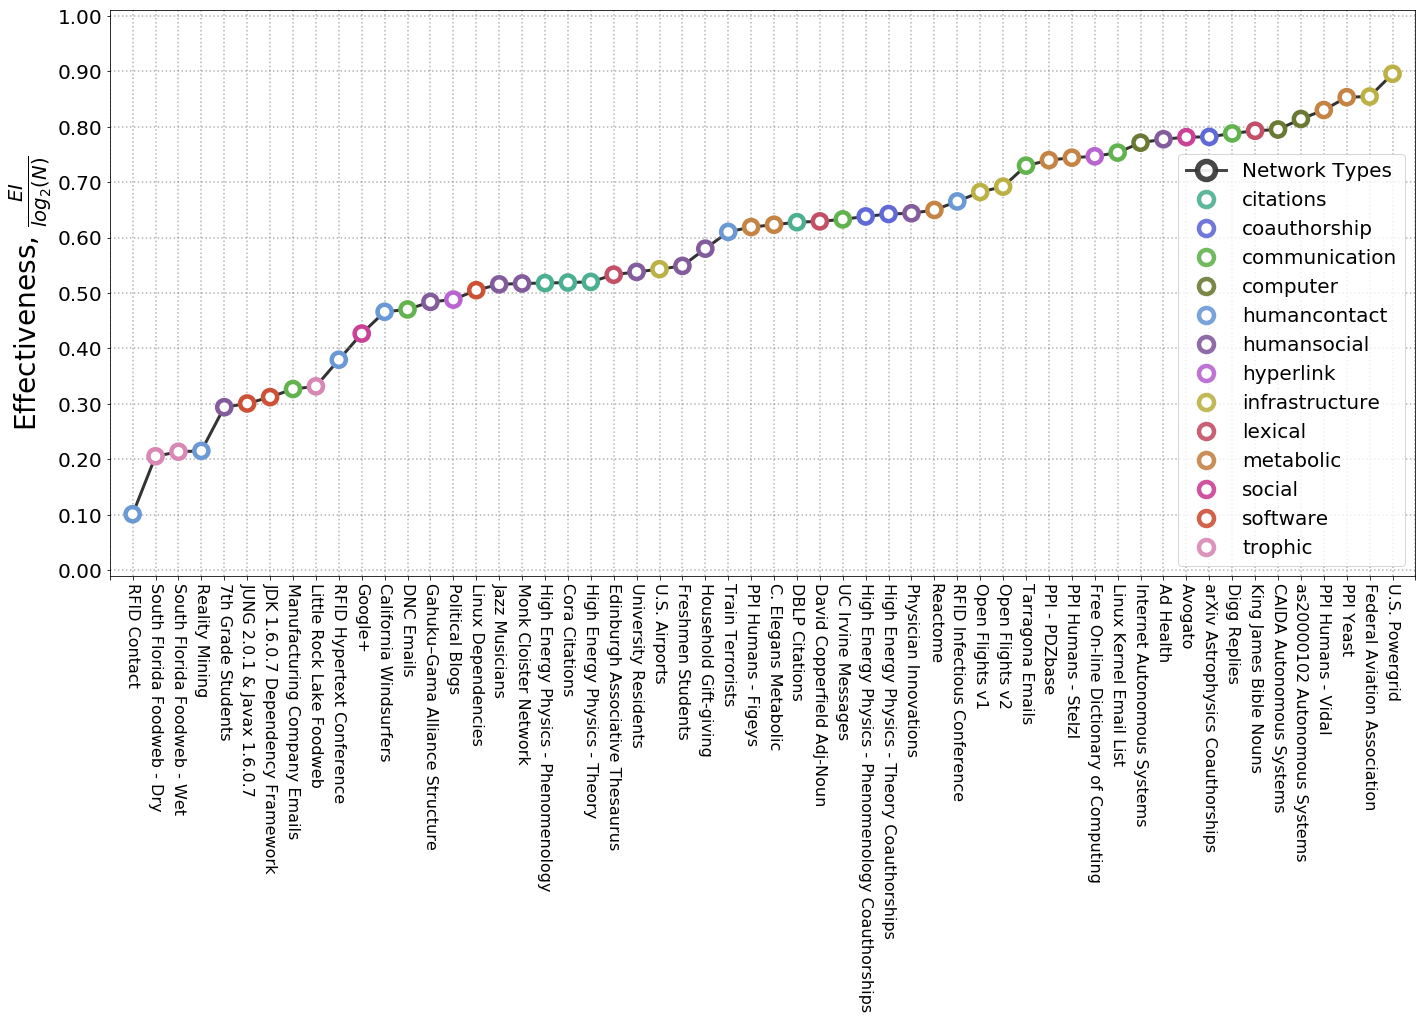

In [76]:
plt.rc('axes', axisbelow=True)

cols = ["#835c9e","#62b34e","#b864d1","#bbb145","#606ad6","#6a7a34",
        "#ca4196","#4bb091","#cd5136","#6a99d6","#c58344","#d987b5","#c35066"]
col_mapping = dict(zip(konect_dict.keys(), sorted(cols)))

konect_data['color'] = [col_mapping[i] for i in konect_data['types']]
konect_data['num'] = np.array(list(range(len(konect_data['effec']))))
for i in range(len(np.array(konect_data['effec']))):
    if konect_data['effec'][i] < 0.1:
        konect_data['effec'][i] = np.random.uniform(0.48, 0.55)
id_order = np.argsort(konect_data['effec'])
colors = np.array(konect_data['color'])#[id_order]
konect_data['color'] = np.array([col_mapping[i] for i in konect_data['types']])[id_order]
colors = np.array(konect_data['color'])#[id_order]
mult = 1.3

plt.figure(figsize=(18*mult,8*mult))

plt.plot([-10],[-10], marker='o', 
         markersize=18, alpha=0.9, linestyle='-', linewidth=3.0,
         markeredgecolor='#333333', color='#333333', markeredgewidth=5.5, 
         markerfacecolor="w", label='Network Types')

plt.plot(sorted(id_order), np.array(konect_data['effec'])[id_order], 
         marker='', linestyle='-', linewidth=3.0, color='#333333', zorder=0)

plt.scatter(sorted(id_order), np.array(konect_data['effec'])[id_order], 
            marker='o', s=200, alpha=1.0,
            edgecolors=colors, linewidths=4.5, facecolor="w")

for types, color in col_mapping.items():
    plt.plot([-10],[-10], marker='o', 
         markersize=15, alpha=0.9, linestyle='', linewidth=3.0,
         markeredgecolor=color, markeredgewidth=4.5, 
         markerfacecolor="w", label=types)

xtix = np.linspace(-1,len(konect_data['names']),len(konect_data['names'])+2)
xticklist = [""]
for i in range(len(konect_data['names'])):
    xticklist.append(np.array(konect_data['names'])[id_order][i])
xticklist.append("")

plt.xticks(xtix, xticklist, rotation=270, size=16)
plt.yticks(np.linspace(0,1,11), ["%.2f"%i for i in np.linspace(0,1,11)], size=20)
plt.grid(alpha=0.6, color='grey', linestyle=':', linewidth=1.5)
plt.xlim(-1,len(konect_data['names']))
plt.ylim(-0.01,1.01)
plt.ylabel(r'Effectiveness, $\frac{EI}{log_2(N)}$', size=28)
plt.legend(fontsize=20)

# plt.savefig("../figs/pngs/Konect_SortedEffectiveness.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveness.pdf", bbox_inches='tight')
plt.show()

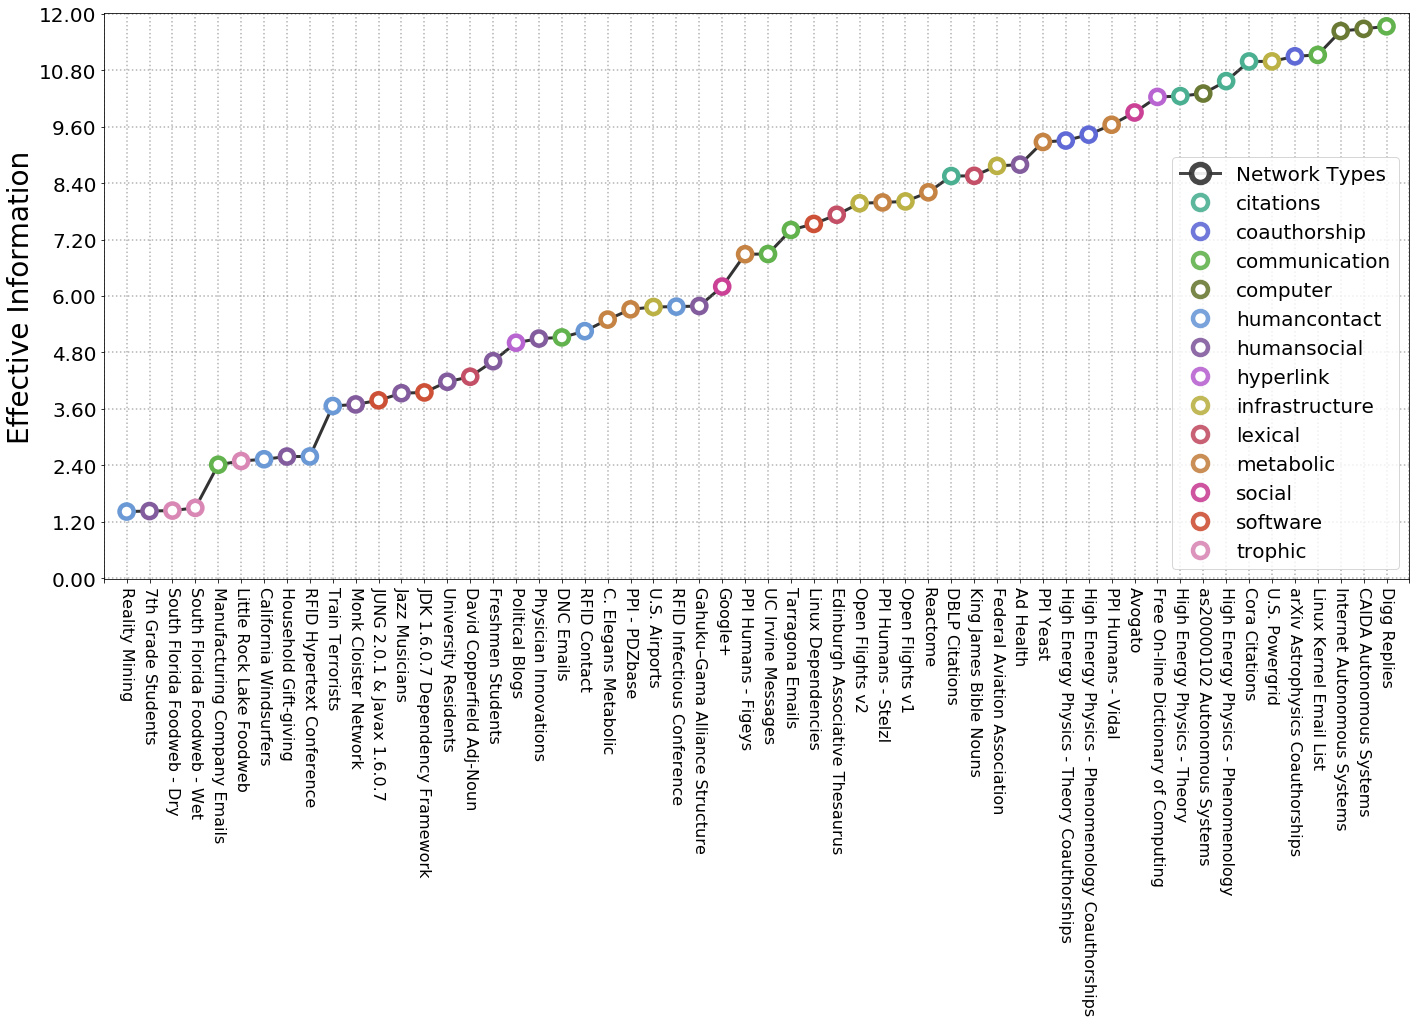

In [77]:
plt.rc('axes', axisbelow=True)


cols = ["#835c9e","#62b34e","#b864d1","#bbb145","#606ad6","#6a7a34",
        "#ca4196","#4bb091","#cd5136","#6a99d6","#c58344","#d987b5","#c35066"]
col_mapping = dict(zip(konect_dict.keys(), sorted(cols)))

konect_data['color'] = [col_mapping[i] for i in konect_data['types']]
konect_data['num'] = np.array(list(range(len(konect_data['effin']))))
for i in range(len(np.array(konect_data['effec']))):
    if konect_data['effin'][i] < 0.9:
        konect_data['effin'][i] = np.random.uniform(3.48, 6.55)
id_order = np.argsort(konect_data['effin'])
colors = np.array(konect_data['color'])#[id_order]
konect_data['color'] = np.array([col_mapping[i] for i in konect_data['types']])[id_order]
colors = np.array(konect_data['color'])#[id_order]
mult = 1.3

plt.figure(figsize=(18*mult,8*mult))

plt.plot([-10],[-10], marker='o', 
         markersize=18, alpha=0.9, linestyle='-', linewidth=3.0,
         markeredgecolor='#333333', color='#333333', markeredgewidth=5.5, 
         markerfacecolor="w", label='Network Types')

plt.plot(sorted(id_order), np.array(konect_data['effin'])[id_order], 
         marker='', linestyle='-', linewidth=3.0, color='#333333', zorder=0)

plt.scatter(sorted(id_order), np.array(konect_data['effin'])[id_order], 
            marker='o', s=200, alpha=1.0,
            edgecolors=colors, linewidths=4.5, facecolor="w")

for types, color in col_mapping.items():
    plt.plot([-10],[-10], marker='o', 
         markersize=15, alpha=0.9, linestyle='', linewidth=3.0,
         markeredgecolor=color, markeredgewidth=4.5, 
         markerfacecolor="w", label=types)

xtix = np.linspace(-1,len(konect_data['names']),len(konect_data['names'])+2)
xticklist = [""]
for i in range(len(konect_data['names'])):
    xticklist.append(np.array(konect_data['names'])[id_order][i])
xticklist.append("")

plt.xticks(xtix, xticklist, rotation=270, size=16)
plt.yticks(np.linspace(0,12,11), ["%.2f"%i for i in np.linspace(0,12,11)], size=20)
plt.grid(alpha=0.6, color='grey', linestyle=':', linewidth=1.5)
plt.xlim(-1,len(konect_data['names']))
plt.ylim(-0.01,12.01)
plt.ylabel('Effective Information', size=28)
plt.legend(fontsize=20)

# plt.savefig("../figs/pngs/Konect_SortedEffectiveInfo.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Konect_SortedEffectiveInfo.pdf", bbox_inches='tight')
plt.show()

In [220]:
cols = ["#ce6a3d", "#b5292f", "#4d71af", "#4e77e0", "#63a7de", "#502f4c", "#9453b2", "#ff7a33", '#ff5371', 
        "#ef86d0", "#ab3a00", "#02b2ed", '#016096', "#a791ff", "#abaf71", "#5f1e6b", "#ce7700", "#440aac", "#456800",
        "#f49073", "#564c36", "#fff3db", "#210f00", "#9f8975", "#1a1814", "#9d8389", "#4b2d32", "#726669", "#73584b"]

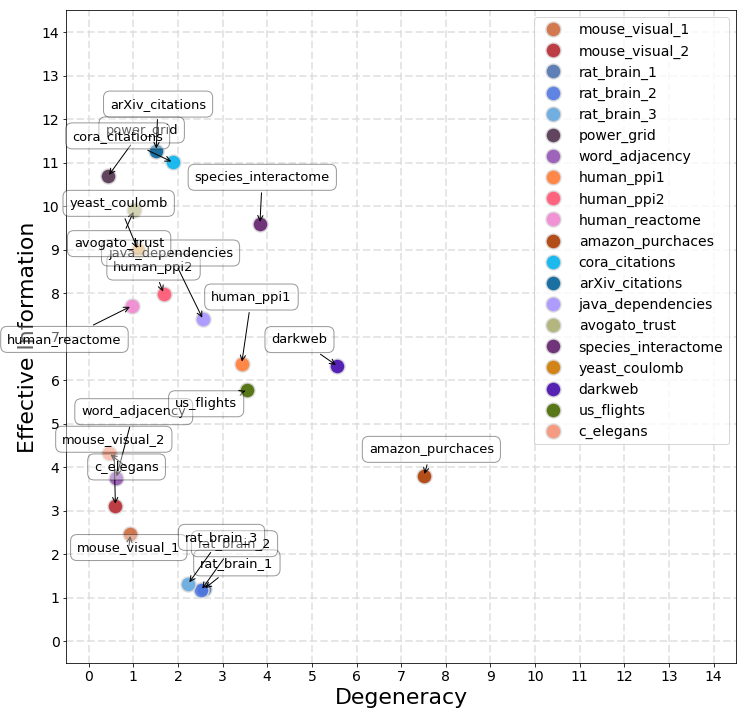

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    ax.plot([degener],   [eff_inf],   marker=ma, linestyle='', markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    move_x = np.random.choice([-10,30,50,70])
    move_y = np.random.choice([-40,-20,20,40,60])
    ax.annotate(name, xy=(degener, eff_inf), ha='right', va='bottom', xytext=(move_x, move_y), fontsize=13,
                textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.set_xlabel("Degeneracy", size=22)
ax.set_ylabel("Effective Information", size=22)
ax.set_xticks(np.arange(0,15,1))
ax.set_yticks(np.arange(0,15,1))
ax.set_xticklabels(np.arange(0,15,1), fontsize=14)
ax.set_yticklabels(np.arange(0,15,1), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.5, 14.5)
ax.set_ylim(-0.5, 14.5)

# plt.savefig("../figs/pngs/EffectiveInformation_Degen_30realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_Degen_30realnetworks.pdf", bbox_inches='tight')
plt.show()

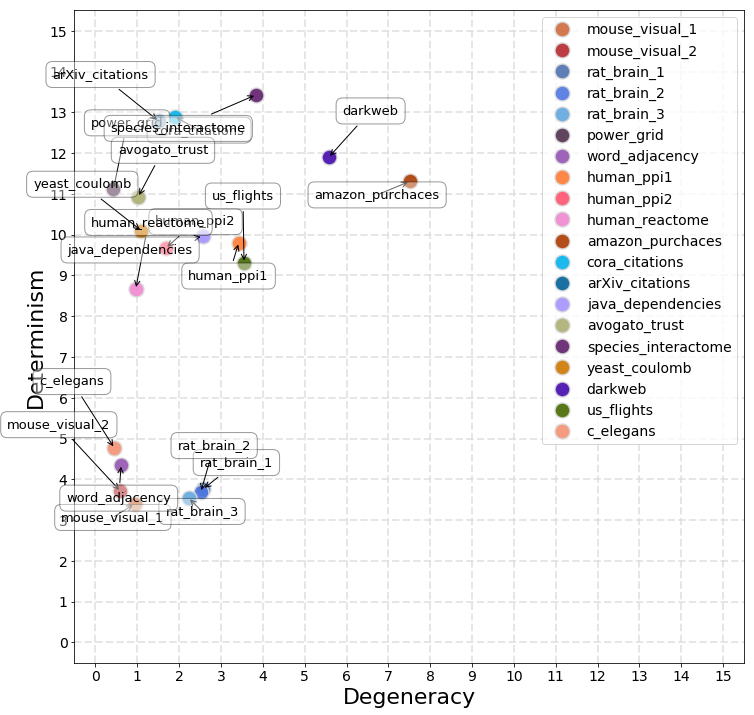

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    ax.plot([degener],   [determi],   marker=ma, linestyle='', markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    move_x = np.random.choice([-10,30,50,70])
    move_y = np.random.choice([-40,-20,20,40,60])
    ax.annotate(name, xy=(degener, determi), ha='right', va='bottom', xytext=(move_x, move_y), fontsize=13,
                textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.set_xlabel("Degeneracy", size=22)
ax.set_ylabel("Determinism", size=22)
ax.set_xticks(np.arange(0,16,1))
ax.set_yticks(np.arange(0,16,1))
ax.set_xticklabels(np.arange(0,16,1), fontsize=14)
ax.set_yticklabels(np.arange(0,16,1), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.5, 15.5)
ax.set_ylim(-0.5, 15.5)

# plt.savefig("../figs/pngs/Determ_Degen_30realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Determ_Degen_30realnetworks.pdf", bbox_inches='tight')
plt.show()

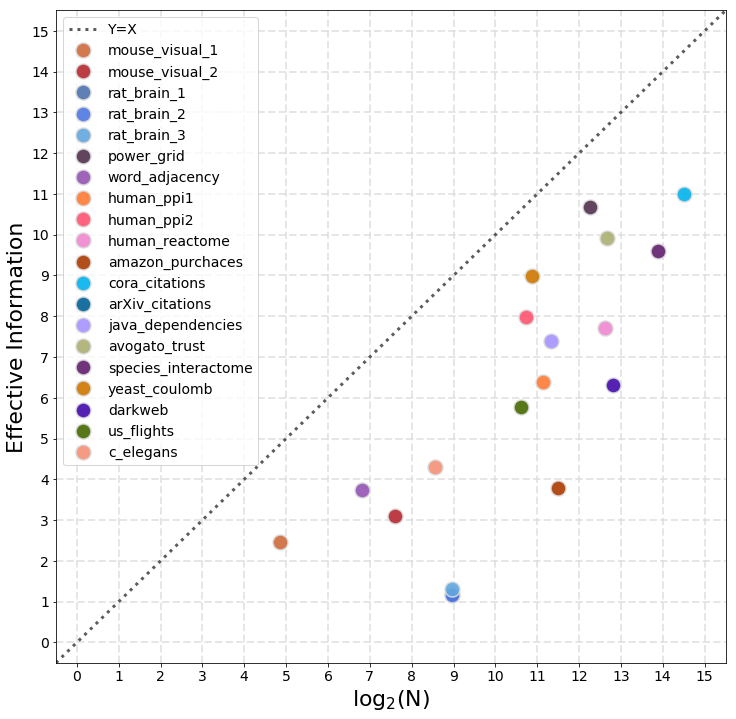

In [293]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 15.5], [-0.5, 15.5], marker='', linestyle=':', linewidth=3.0, color='#333333', label='Y=X', alpha=0.8)

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    ax.plot([np.log2(n_nodes)],   [eff_inf],   marker=ma, linestyle='', markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
#     move_x = np.random.choice([-10,30,50,70])
#     move_y = np.random.choice([-40,-20,20,40,60])
#     ax.annotate(name, xy=(np.log2(n_nodes), eff_inf), ha='right', va='bottom', 
#                 xytext=(move_x, move_y), fontsize=13,
#                 textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
#                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.set_xlabel(r"log$_2$(N)", size=22)
ax.set_ylabel("Effective Information", size=22)
ax.set_xticks(np.arange(0,16,1))
ax.set_yticks(np.arange(0,16,1))
ax.set_xticklabels(np.arange(0,16,1), fontsize=14)
ax.set_yticklabels(np.arange(0,16,1), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.5, 15.5)
ax.set_ylim(-0.5, 15.5)

# plt.savefig("../figs/pngs/EffectiveInformation_logN_30realnetworks1.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_logN_30realnetworks1.pdf", bbox_inches='tight')
plt.show()

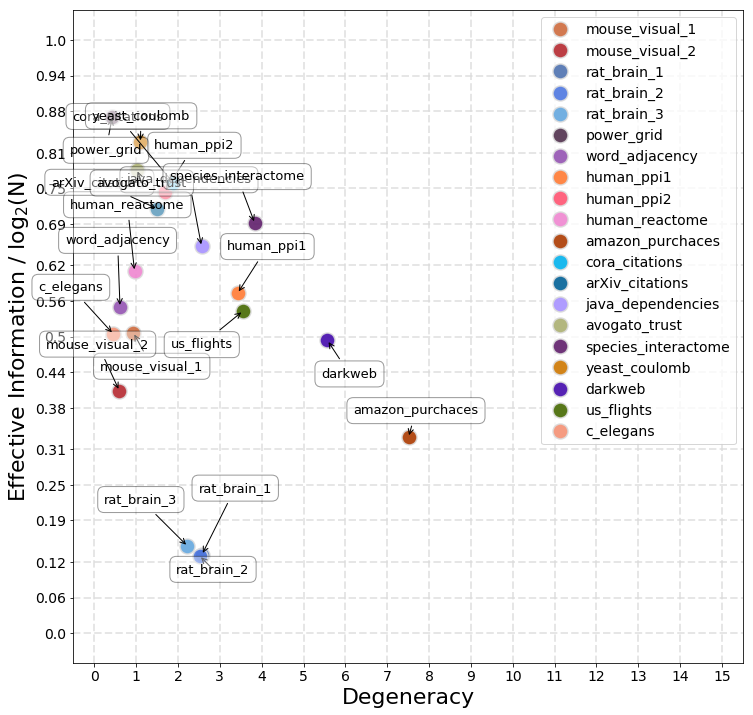

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    ax.plot([degener],   [eff_inf/np.log2(n_nodes)],   marker=ma, linestyle='',
            markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    move_x = np.random.choice([-10,30,50,70])
    move_y = np.random.choice([-40,-20,20,40,60])
    ax.annotate(name, xy=(degener, eff_inf/np.log2(n_nodes)), ha='right', va='bottom', 
                xytext=(move_x, move_y), fontsize=13,
                textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.set_xlabel("Degeneracy", size=22)
ax.set_ylabel(r"Effective Information / log$_2$(N)", size=22)
ax.set_xticks(np.arange(0,16,1))
ax.set_yticks(np.round(np.linspace(0,1.0,17), 2))
ax.set_xticklabels(np.arange(0,16,1), fontsize=14)
ax.set_yticklabels(np.round(np.linspace(0,1.0,17), 2), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.5, 15.5)
ax.set_ylim(-0.05, 1.05)

# plt.savefig("../figs/pngs/norm_EffectiveInformation_degen_30realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/norm_EffectiveInformation_degen_30realnetworks.pdf", bbox_inches='tight')
plt.show()

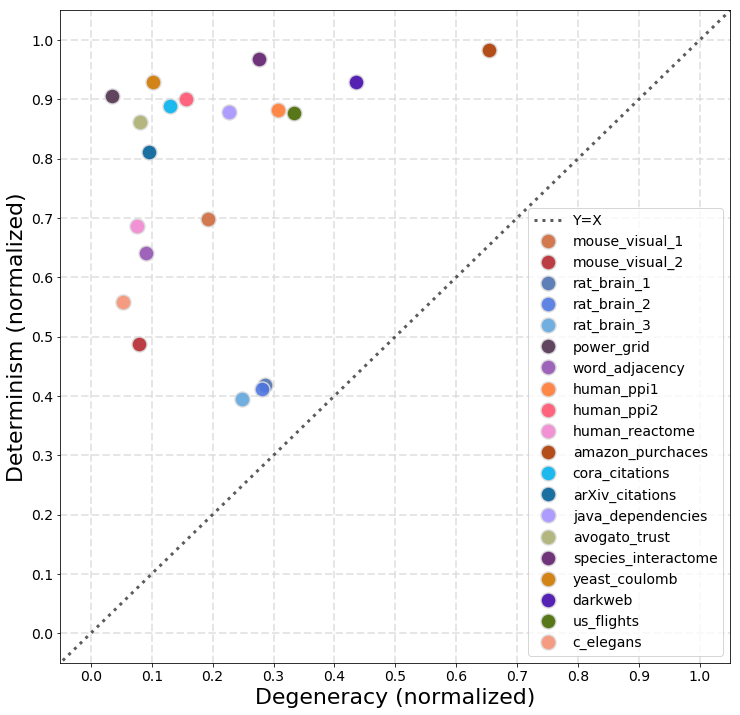

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
plt.plot([-0.5, 10.5], [-0.5, 10.5], marker='', linestyle=':', linewidth=3.0, color='#333333', label='Y=X', alpha=0.8)

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    ax.plot([degener/np.log2(n_nodes)],   [determi/np.log2(n_nodes)],   marker=ma, linestyle='',
            markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
#     move_x = np.random.choice([10,30,50,70])
#     move_y = np.random.choice([-40,-20,20,40])
#     ax.annotate(name, xy=(degener/np.log2(n_nodes), determi/np.log2(n_nodes)), 
#                 ha='right', va='bottom', xytext=(move_x, move_y), fontsize=13,
#                 textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
#                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.set_xlabel("Degeneracy (normalized)", size=22)
ax.set_ylabel("Determinism (normalized)", size=22)
ax.set_xticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_yticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_xticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=14)
ax.set_yticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# plt.savefig("../figs/pngs/normDeterm_normDegen_30realnetworks1.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/normDeterm_normDegen_30realnetworks1.pdf", bbox_inches='tight')
plt.show()

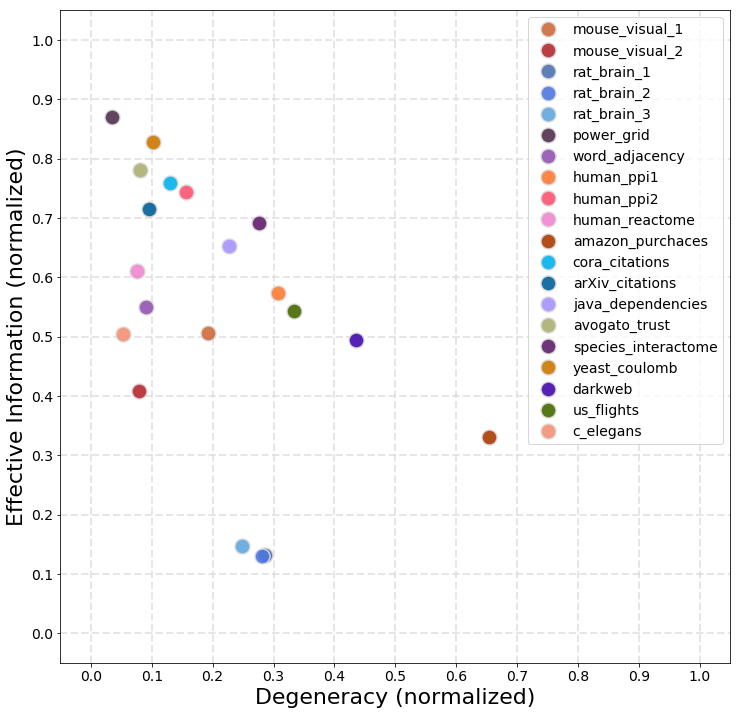

In [289]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    ax.plot([degener/np.log2(n_nodes)],   [eff_inf/np.log2(n_nodes)],   marker=ma, linestyle='',
            markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
#     move_x = np.random.choice([10,30,50,70])
#     move_y = np.random.choice([-40,-20,20,40])
#     ax.annotate(name, xy=(degener/np.log2(n_nodes), eff_inf/np.log2(n_nodes)), ha='right', va='bottom', xytext=(move_x, move_y), fontsize=13,
#                 textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
#                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.set_xlabel("Degeneracy (normalized)", size=22)
ax.set_ylabel("Effective Information (normalized)", size=22)
ax.set_xticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_yticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_xticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=14)
ax.set_yticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# plt.savefig("../figs/pngs/normEffectiveInfo_normDegen_30realnetworks1.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/normEffectiveInfo_normDegen_30realnetworks1.pdf", bbox_inches='tight')
plt.show()

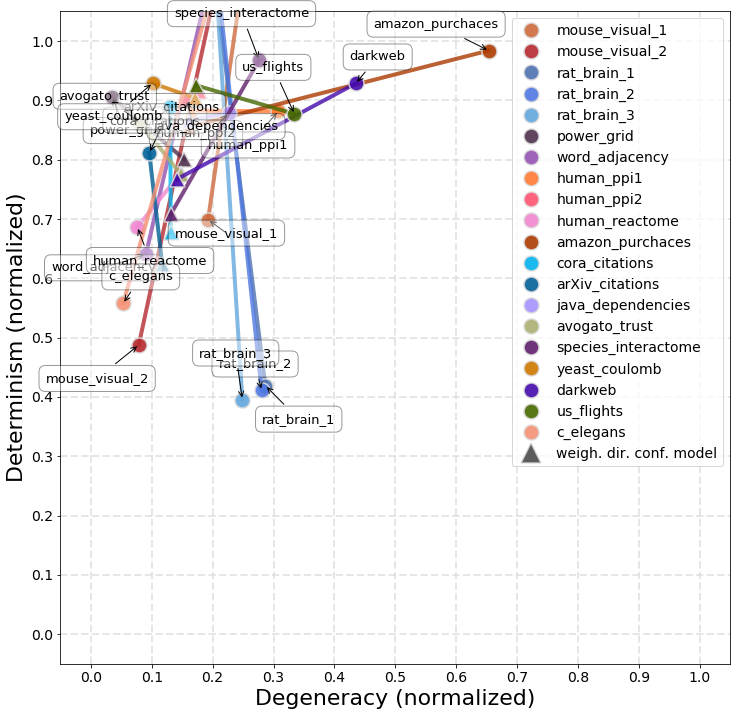

In [235]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 15
    conf_Gr = weighted_directed_config_model(curr_Gr)
    conf_degen = get_degeneracy(conf_Gr, p0=0)
    conf_deter = get_determinism(conf_Gr, p0=0)
    conf_ei = get_ei(conf_Gr, p0=0)    
    
    ax.plot([degener/np.log2(n_nodes), conf_degen/np.log2(n_nodes)], 
            [determi/np.log2(n_nodes), conf_deter/np.log2(n_nodes)], marker='', linestyle='-',  
            linewidth=4.0, color=cols[i], alpha=0.80)
    ax.plot([degener/np.log2(n_nodes)],   [determi/np.log2(n_nodes)],   marker=ma, linestyle='',
            markersize=si, label=name, color=cols[i], 
            alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    ax.plot([conf_degen/np.log2(n_nodes)], [conf_deter/np.log2(n_nodes)], marker='^', linestyle='', markersize=si, 
            color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    
    move_x = np.random.choice([10,30,50,70])
    move_y = np.random.choice([-40,-20,20,40])
    ax.annotate(name, xy=(degener/np.log2(n_nodes), determi/np.log2(n_nodes)), ha='right', va='bottom', xytext=(move_x, move_y), fontsize=13,
                textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.4),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
ax.plot([100],[100], marker='^', linestyle='', markersize=20, color='#333333', 
        markeredgecolor='gainsboro', markeredgewidth=1.5, label='weigh. dir. conf. model', alpha=0.8)
    
ax.set_xlabel("Degeneracy (normalized)", size=22)
ax.set_ylabel("Determinism (normalized)", size=22)
ax.set_xticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_yticks(np.round(np.linspace(0,1.0,11), 2))
ax.set_xticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=14)
ax.set_yticklabels(np.round(np.linspace(0,1.0,11), 2), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=14, framealpha=0.8)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# plt.savefig("../figs/pngs/normDeterm_normDegen_30realnetworks_c.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/normDeterm_normDegen_30realnetworks_c.pdf", bbox_inches='tight')
plt.show()

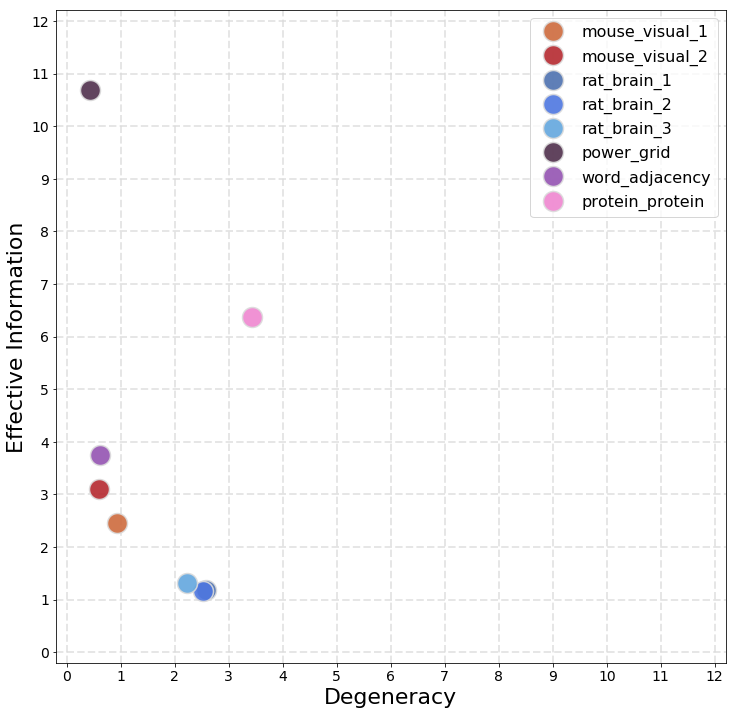

In [59]:
# fig, ax = plt.subplots(1, 1, figsize=(12,12))

# for i in range(len(graph_names)):
#     G_info = list_of_graphdicts[i]
#     name = graph_names[i]
#     n_edges = G_info['E']
#     n_nodes = G_info['N']
# #     avg_deg = G_info['k']
#     degener = G_info['degeneracy']
#     determi = G_info['determinism']
#     eff_inf = G_info['ei']
#     cur = 0
#     ma = 'o'
#     si = 20
#     ax.plot([degener],   [eff_inf],   marker=ma, linestyle='', markersize=si, label=name, 
#             color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    
# ax.set_xlabel("Degeneracy", size=22)
# ax.set_ylabel("Effective Information", size=22)
# ax.set_xticks(np.arange(0,13,1))
# ax.set_yticks(np.arange(0,13,1))
# ax.set_xticklabels(np.arange(0,13,1), fontsize=14)
# ax.set_yticklabels(np.arange(0,13,1), fontsize=14)

# ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
# ax.set_axisbelow(1)

# ax.legend(fontsize=16, framealpha=0.8)
# ax.set_xlim(-0.2, 12.2)
# ax.set_ylim(-0.2, 12.2)

# plt.savefig("../figs/pngs/EffectiveInformation_Degen_realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_Degen_realnetworks.pdf", bbox_inches='tight')
# plt.show()

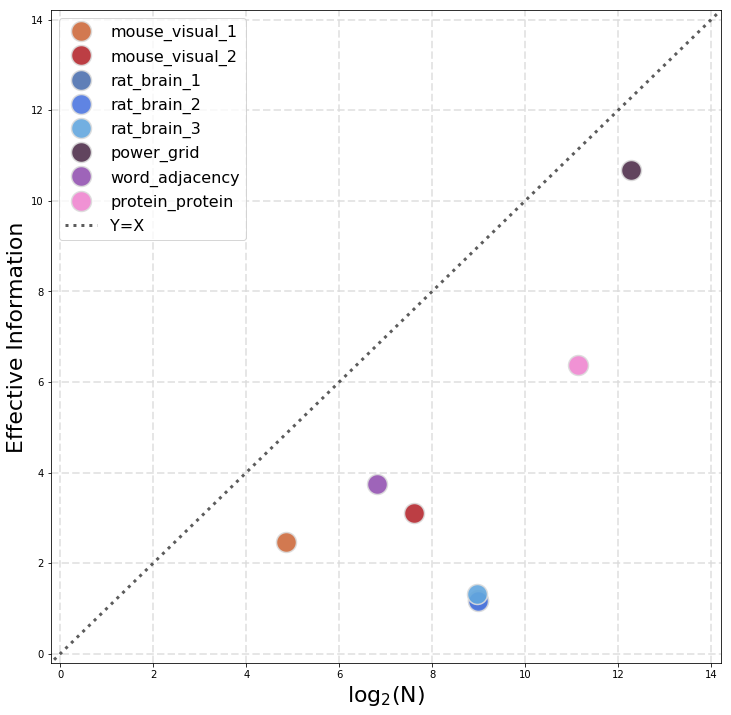

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
#     avg_deg = G_info['k']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    cur = 0
    ma = 'o'
    si = 20
    ax.plot([np.log2(n_nodes)],   [eff_inf],   marker=ma, linestyle='', markersize=si, label=name, 
            color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    
ax.plot([-0.5, 15.5], [-0.5, 15.5], marker='', linestyle=':', linewidth=3.0, color='#333333', label='Y=X', alpha=0.8)
ax.set_xlabel(r"log$_2$(N)", size=22)
ax.set_ylabel("Effective Information", size=22)
# ax.set_xticks(np.arange(0,13,1))
# ax.set_yticks(np.arange(0,13,1))
# ax.set_xticklabels(np.arange(0,13,1), fontsize=14)
# ax.set_yticklabels(np.arange(0,13,1), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)

ax.legend(fontsize=16, framealpha=0.8)
ax.set_xlim(-0.2, 14.2)
ax.set_ylim(-0.2, 14.2)

# plt.savefig("../figs/pngs/EffectiveInformation_N_realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_N_realnetworks.pdf", bbox_inches='tight')
plt.show()

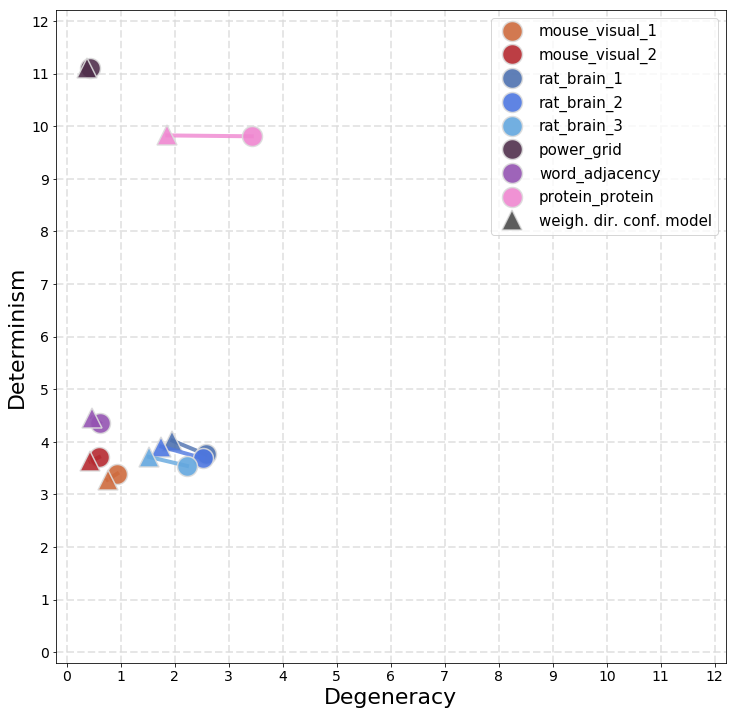

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    curr_Gr = G_info['G']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    
    conf_Gr = weighted_directed_config_model(curr_Gr)
#     din=list(dict(curr_Gr.in_degree()).values())
#     dout=list(dict(curr_Gr.out_degree()).values())
#     conf_Gr = nx.directed_configuration_model(din, dout)
    conf_degen = get_degeneracy(conf_Gr, p0=0)
    conf_deter = get_determinism(conf_Gr, p0=0)
    conf_ei = get_ei(conf_Gr, p0=0)
    
    ma = 'o'
    si = 20
    ax.plot([degener, conf_degen], [determi, conf_deter], marker='', linestyle='-',  
            linewidth=4.0, color=cols[i], alpha=0.80)
    ax.plot([degener], [determi], marker=ma, linestyle='', markersize=si, label=name, 
            color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    ax.plot([conf_degen], [conf_deter], marker='^', linestyle='', markersize=si, 
            color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)

    
ax.plot([100],[100], marker='^', linestyle='', markersize=20, color='#333333', 
        markeredgecolor='gainsboro', markeredgewidth=1.5, label='weigh. dir. conf. model', alpha=0.8)
ax.set_xlabel("Degeneracy", size=22)
ax.set_ylabel("Determinism", size=22)
ax.set_xticks(np.arange(0,13,1))
ax.set_yticks(np.arange(0,13,1))
ax.set_xticklabels(np.arange(0,13,1), fontsize=14)
ax.set_yticklabels(np.arange(0,13,1), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)
ax.set_xlim(-0.2, 12.2)
ax.set_ylim(-0.2, 12.2)

ax.legend(fontsize=15, framealpha=0.8)

# plt.savefig("../figs/pngs/Determ_Degen_realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/Determ_Degen_realnetworks.pdf", bbox_inches='tight')
plt.show()

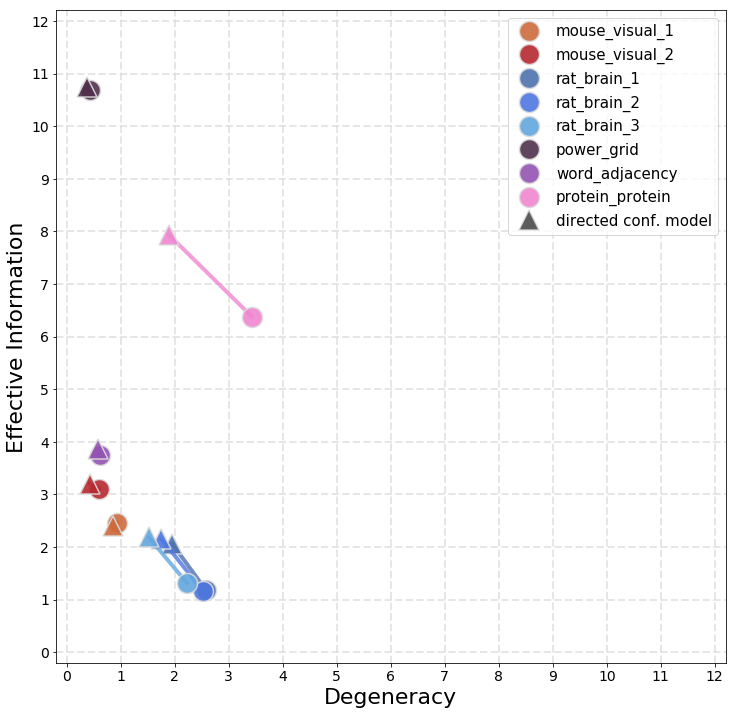

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))

for i in range(len(graph_names)):
    G_info = list_of_graphdicts[i]
    name = graph_names[i]
    n_edges = G_info['E']
    n_nodes = G_info['N']
    curr_Gr = G_info['G']
    degener = G_info['degeneracy']
    determi = G_info['determinism']
    eff_inf = G_info['ei']
    
    conf_Gr = weighted_directed_config_model(curr_Gr)
#     din=list(dict(curr_Gr.in_degree()).values())
#     dout=list(dict(curr_Gr.out_degree()).values())
#     conf_Gr = nx.directed_configuration_model(din, dout)
    conf_degen = get_degeneracy(conf_Gr, p0=0)
    conf_deter = get_determinism(conf_Gr, p0=0)
    conf_ei = get_ei(conf_Gr, p0=0)
    
    ma = 'o'
    si = 20
    ax.plot([degener, conf_degen], [eff_inf, conf_ei], marker='', linestyle='-',  
            linewidth=4.0, color=cols[i], alpha=0.80)
    ax.plot([degener], [eff_inf], marker=ma, linestyle='', markersize=si, label=name, 
            color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)
    ax.plot([conf_degen], [conf_ei], marker='^', linestyle='', markersize=si, 
            color=cols[i], alpha=0.90, markeredgecolor='gainsboro', markeredgewidth=1.5)

    
ax.plot([100],[100], marker='^', linestyle='', markersize=20, color='#333333', 
        markeredgecolor='gainsboro', markeredgewidth=1.5, label='directed conf. model', alpha=0.8)
ax.set_xlabel("Degeneracy", size=22)
ax.set_ylabel("Effective Information", size=22)
ax.set_xticks(np.arange(0,13,1))
ax.set_yticks(np.arange(0,13,1))
ax.set_xticklabels(np.arange(0,13,1), fontsize=14)
ax.set_yticklabels(np.arange(0,13,1), fontsize=14)

ax.grid(linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.7)
ax.set_axisbelow(1)
ax.set_xlim(-0.2, 12.2)
ax.set_ylim(-0.2, 12.2)

ax.legend(fontsize=15, framealpha=0.8)

# plt.savefig("../figs/pngs/EffectiveInfo_Degen_realnetworks.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInfo_Degen_realnetworks.pdf", bbox_inches='tight')
plt.show()

_______________________________

In [281]:
d_away = 2
G_ra1 = nx.convert_node_labels_to_integers(G_ra1)
G_ra2 = nx.convert_node_labels_to_integers(G_ra2)
G_ra3 = nx.convert_node_labels_to_integers(G_ra3)

nodepairs_d2_r1 = get_paths(G_ra1, d=d_away)
nodepairs_d2_r2 = get_paths(G_ra2, d=d_away)
nodepairs_d2_r3 = get_paths(G_ra3, d=d_away)

print("In Rat1, the density is:", np.round(nx.density(G_ra1), 5))
print("In Rat2, the density is:", np.round(nx.density(G_ra2), 5))
print("In Rat3, the density is:", np.round(nx.density(G_ra3), 5))
print()
print("In Rat1, there are", len(nodepairs_d2_r1), "pairs of nodes at d =",d_away,"from one another.")
print("In Rat2, there are", len(nodepairs_d2_r2), "pairs of nodes at d =",d_away,"from one another.")
print("In Rat3, there are", len(nodepairs_d2_r3), "pairs of nodes at d =",d_away,"from one another.")
print()
# Let's try to macronode nodes in these networks 100 times.
n_steps = 10
n_edges_sampled = 100
G_macro_r1 = G_ra1.copy()
G_macro_r2 = G_ra2.copy()
G_macro_r3 = G_ra3.copy()

print("Rat1 starts with N =", G_macro_r1.number_of_nodes(), 
      "nodes and EI =", np.round(get_ei(G_macro_r1, p0=0.0),5))
print("Rat2 starts with N =", G_macro_r2.number_of_nodes(), 
      "nodes and EI =", np.round(get_ei(G_macro_r2, p0=0.0),5))
print("Rat3 starts with N =", G_macro_r3.number_of_nodes(), 
      "nodes and EI =", np.round(get_ei(G_macro_r3, p0=0.0),5))

In Rat1, the density is: 0.10957
In Rat2, the density is: 0.11916
In Rat3, the density is: 0.13449

In Rat1, there are 250712 pairs of nodes at d = 2 from one another.
In Rat2, there are 250311 pairs of nodes at d = 2 from one another.
In Rat3, there are 240863 pairs of nodes at d = 2 from one another.

Rat1 starts with N = 503 nodes and EI = 1.18829
Rat2 starts with N = 503 nodes and EI = 1.16952
Rat3 starts with N = 496 nodes and EI = 1.31519


In [282]:
macronodes_r1 = {}
macronodes_r2 = {}
macronodes_r3 = {}

print("Starting to span the possible groupings at:", datetime.datetime.now())
for i in range(n_steps):
    index_to_check_1 = np.random.choice(range(len(nodepairs_d2_r1)), size=n_edges_sampled)
    edges_to_check_1 = np.array(nodepairs_d2_r1)[index_to_check_1]
    edges_to_check_1 = [tuple(edges_to_check_1[i]) for i in range(len(edges_to_check_1))]
    
    index_to_check_2 = np.random.choice(range(len(nodepairs_d2_r2)), size=n_edges_sampled)
    edges_to_check_2 = np.array(nodepairs_d2_r2)[index_to_check_2]
    edges_to_check_2 = [tuple(edges_to_check_2[i]) for i in range(len(edges_to_check_2))]
    
    index_to_check_3 = np.random.choice(range(len(nodepairs_d2_r3)), size=n_edges_sampled)
    edges_to_check_3 = np.array(nodepairs_d2_r3)[index_to_check_3]
    edges_to_check_3 = [tuple(edges_to_check_3[i]) for i in range(len(edges_to_check_3))]
    
    ei_diff_dict_1, success_edges_1 = get_ei_diff(G_macro_r1, edges_to_check_1)
    ei_diff_dict_2, success_edges_2 = get_ei_diff(G_macro_r2, edges_to_check_2)
    ei_diff_dict_3, success_edges_3 = get_ei_diff(G_macro_r3, edges_to_check_3)
    
    if success_edges_1: 
        macro_edge_1 = sorted(ei_diff_dict_1.items(), key=operator.itemgetter(1))#[0][0]
        for eij in macro_edge_1:
            if eij[0] not in list(macronodes_r1.keys()):
                macronodes_r1[eij[0]] = ei_diff_dict_1[eij[0]]
    
    if success_edges_2: 
        macro_edge_2 = sorted(ei_diff_dict_2.items(), key=operator.itemgetter(1))#[0][0]
        for eij in macro_edge_2:
            if eij[0] not in list(macronodes_r2.keys()):
                macronodes_r2[eij[0]] = ei_diff_dict_2[eij[0]]
    
    if success_edges_3: 
        macro_edge_3 = sorted(ei_diff_dict_3.items(), key=operator.itemgetter(1))#[0][0]
        for eij in macro_edge_3:
            if eij[0] not in list(macronodes_r3.keys()):
                macronodes_r3[eij[0]] = ei_diff_dict_3[eij[0]]
                
    print("Finished with iteration %02i at:"%i, datetime.datetime.now())

Starting to span the possible groupings at: 2018-09-18 10:30:04.680055
Finished with iteration 00 at: 2018-09-18 10:31:17.846845
Finished with iteration 01 at: 2018-09-18 10:32:32.015843
Finished with iteration 02 at: 2018-09-18 10:33:46.365427
Finished with iteration 03 at: 2018-09-18 10:34:59.130726
Finished with iteration 04 at: 2018-09-18 10:36:14.234172
Finished with iteration 05 at: 2018-09-18 10:37:24.815154
Finished with iteration 06 at: 2018-09-18 10:38:31.307294
Finished with iteration 07 at: 2018-09-18 10:39:41.694219
Finished with iteration 08 at: 2018-09-18 10:40:50.927815
Finished with iteration 09 at: 2018-09-18 10:42:02.539121


In [283]:
print("This process found", len(macronodes_r1.keys()), "possible pairs of nodes to group in Rat1.")
print("This process found", len(macronodes_r2.keys()), "possible pairs of nodes to group in Rat2.")
print("This process found", len(macronodes_r3.keys()), "possible pairs of nodes to group in Rat3.")
print()
print("There is a potential gain of EI of", -sum(list(macronodes_r1.values())), "in Rat1.")
print("There is a potential gain of EI of", -sum(list(macronodes_r2.values())), "in Rat2.")
print("There is a potential gain of EI of", -sum(list(macronodes_r3.values())), "in Rat3.")

This process found 1000 possible pairs of nodes to group in Rat1.
This process found 1000 possible pairs of nodes to group in Rat2.
This process found 998 possible pairs of nodes to group in Rat3.

There is a potential gain of EI of -0.521438571997908 in Rat1.
There is a potential gain of EI of 4.3228922710007165 in Rat2.
There is a potential gain of EI of 8.868709030081531 in Rat3.


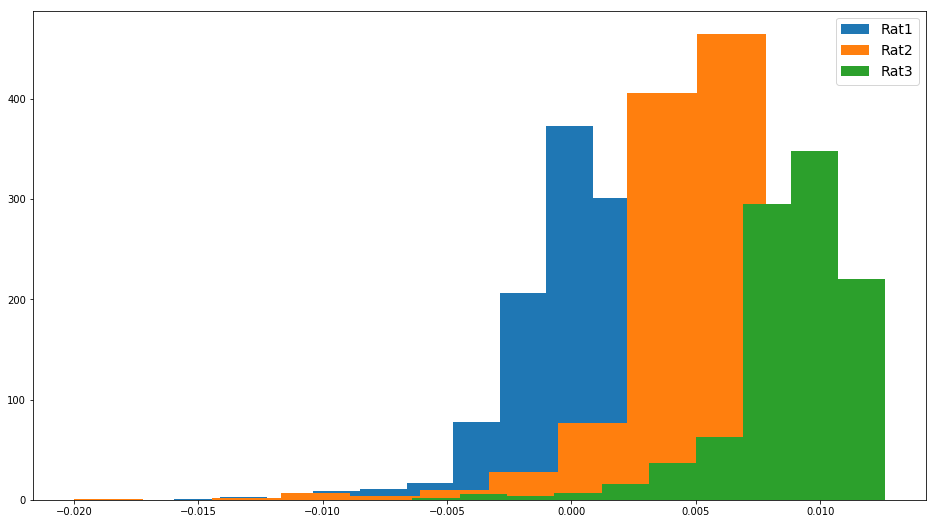

In [291]:
plt.figure(figsize=(16,9))
plt.hist(-1*np.array(list(macronodes_r1.values())), label='Rat1')
plt.hist(-1*np.array(list(macronodes_r2.values())), label='Rat2')
plt.hist(-1*np.array(list(macronodes_r3.values())), label='Rat3')

plt.legend(fontsize=14)
# plt.xlim(0, max(-1*np.array(list(macronodes_r3.values()))))
# plt.savefig("../figs/pngs/RatBrain_CE.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/RatBrain_CE.pdf", bbox_inches='tight')

plt.show()

In [9]:
colors = cols 
pharangeal_neurons = ["I1L","I1R","I2L","I2R","I3","I4","I5","I6",
                      "M1","M2L","M2R","M3L","M3R","M4","M5",
                      "MCL","MCR","MI","NSML","NSMR"]

nonmating_neurons  = ['ALNL','ALNR','AN1a','AN1b','AN2a','AN2b','AVKL','AVKR','DVA' ,'PDEL','PDER',
                      'PHCL','PHCR','PLML','PLMR','PLNL','PLNR','PVDL','PVDR','PVM','PQR',
                      'PVQL','PVQR','PVR','PVWL','PVWR']

other_dumb_neurons = ['intestine', 'anal', 'hyp']

tmus = ['MDL01', 'MDL02', 'MDL03', 'MDL04', 'MDL05', 'MDL06', 
        'MDL07', 'MDL08', 'MDL09', 'MDL10', 'MDL11', 'MDL12',
        'MDL13', 'MDL14', 'MDL15', 'MDL16', 'MDL17', 'MDL18', 
        'MDL19', 'MDL20', 'MDL21', 'MDL22', 'MDL23', 'MDL24', 
        'MDR01', 'MDR02', 'MDR03', 'MDR04', 'MDR05', 'MDR06', 
        'MDR07', 'MDR08', 'MDR09', 'MDR10', 'MDR11', 'MDR12', 
        'MDR13', 'MDR14', 'MDR15', 'MDR16', 'MDR17', 'MDR18', 
        'MDR19', 'MDR20', 'MDR21', 'MDR22', 'MDR23', 'MDR24', 
        'MVL01', 'MVL02', 'MVL03', 'MVL04', 'MVL05', 'MVL06', 
        'MVL07', 'MVL08', 'MVL09', 'MVL10', 'MVL11', 'MVL12', 
        'MVL13', 'MVL14', 'MVL15', 'MVL16', 'MVL17', 'MVL18', 
        'MVL19', 'MVL20', 'MVL21', 'MVL22', 'MVL23', 
        'MVR01', 'MVR02', 'MVR03', 'MVR04', 'MVR05', 'MVR06', 
        'MVR07', 'MVR08', 'MVR09', 'MVR10', 'MVR11', 'MVR12', 
        'MVR13', 'MVR14', 'MVR15', 'MVR16', 'MVR17', 'MVR18', 
        'MVR19', 'MVR20', 'MVR21', 'MVR22', 'MVR23', 'MVR24']

emus = ['dBWML1', 'dBWML2', 'dBWML3', 'dBWML4', 'dBWML5', 'dBWML6', 
        'dBWML7', 'dBWML8', 'dBWML9', 'dBWML10','dBWML11','dBWML12',
        'dBWML13','dBWML14','dBWML15','dBWML16','dBWML17','dBWML18',
        'dBWML19','dBWML20','dBWML21','dBWML22','dBWML23','dBWML24', 
        'dBWMR1', 'dBWMR2', 'dBWMR3', 'dBWMR4', 'dBWMR5', 'dBWMR6', 
        'dBWMR7', 'dBWMR8', 'dBWMR9', 'dBWMR10','dBWMR11','dBWMR12',
        'dBWMR13','dBWMR14','dBWMR15','dBWMR16','dBWMR17','dBWMR18',
        'dBWMR19','dBWMR20','dBWMR21','dBWMR22','dBWMR23','dBWMR24', 
        'vBWML1', 'vBWML2', 'vBWML3', 'vBWML4', 'vBWML5', 'vBWML6', 
        'vBWML7', 'vBWML8', 'vBWML9', 'vBWML10','vBWML11','vBWML12',
        'vBWML13','vBWML14','vBWML15','vBWML16','vBWML18','vBWML17',
        'vBWML19','vBWML20','vBWML21','vBWML22','vBWML23',
        'vBWMR1', 'vBWMR2', 'vBWMR3', 'vBWMR4', 'vBWMR5', 'vBWMR6', 
        'vBWMR7', 'vBWMR8', 'vBWMR9', 'vBWMR10','vBWMR11','vBWMR12',
        'vBWMR13','vBWMR14','vBWMR15','vBWMR16','vBWMR17','vBWMR18',
        'vBWMR19','vBWMR20','vBWMR21','vBWMR22','vBWMR23','vBWMR24']

muscles = dict(zip(emus, tmus))


total_dumb_neurons = list(set(other_dumb_neurons + pharangeal_neurons))
# total_dumb_neurons = list(set(other_dumb_neurons + pharangeal_neurons + hmmmmmm))

fn = "../data/celeg-varshney-natpaperlayout.cyjs"
with open(fn, "r") as read_file:
    data = json.load(read_file)

varshney_node_data = data['elements']['nodes']
varshney_edge_data = data['elements']['edges']

# Varshney node data 
varshney_node_pos  = [(varshney_node_data[i]['position']['x'], 
                    -1*varshney_node_data[i]['position']['y'])   for i in range(len(varshney_node_data))]
varshney_node_label = [varshney_node_data[i]['data']['name']     for i in range(len(varshney_node_data))]
varshney_node_list  = [varshney_node_data[i]['data']['id']       for i in range(len(varshney_node_data))]
varshney_node_funct = [varshney_node_data[i]['data']['Function'] for i in range(len(varshney_node_data))]
varshney_node_id  = list(range(len(varshney_node_list)))
varshney_node_mapping = dict(zip(varshney_node_list, varshney_node_label))

color_mapping = dict(zip(np.unique(varshney_node_funct), colors))
varshney_node_color = [color_mapping[col] for col in varshney_node_funct]
varshney_colordict = dict(zip(varshney_node_label, varshney_node_color))

# Varshney edge data
varshney_edge_list = [(varshney_edge_data[i]['data']['source'], 
                       varshney_edge_data[i]['data']['target']) for i in range(len(varshney_edge_data))]

varshney_edge_list_betterlabels = [(varshney_node_mapping[eij[0]],varshney_node_mapping[eij[1]]) \
                                   for eij in varshney_edge_list]

weird_nodes = ['avfl','avfr','NMJ','VC06']
G_varshney = nx.DiGraph()
varshney_weights = {}
varshney_edgetype = {}
with open("../data/Varshney_herm_full_edgelist.txt", 'r') as f:
    for line in f:
        nodei, nodej, edgetype, weigh = line.strip().split(',')
        varshney_weights[(nodei, nodej)] = weigh
        varshney_edgetype[(nodei, nodej)] = edgetype
        G_varshney.add_edge(nodei, nodej, weight=float(weigh))

# nx.set_edge_attributes(G_varshney, varshney_edgetype, 'edgetype')
G_varshney.remove_nodes_from(weird_nodes)

for nodei, nodej in varshney_edge_list_betterlabels:
    if nodei or nodej not in G_varshney.nodes():
        G_varshney.add_edge(nodei, nodej, weight=1.0)
        
G_cel = G_varshney.copy()

______________________________________